In [1]:
#import dependencies
import pandas as pd 
import scipy as scipy
import numpy as np 
import matplotlib.pyplot as plt
import datetime
from scipy.stats import linregress

In [2]:
new_data = pd.read_csv('Resources/Chicago_crimes.csv')

In [3]:
trimmed = new_data.dropna()
len(trimmed)

977130

In [4]:
trimmed.sort_values(by=["Year"], inplace = True)
trimmed

C:\Users\wuebb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Location,Date
282677,ROBBERY,STRONG ARM - NO WEAPON,CHA PARKING LOT / GROUNDS,False,False,215,2.0,3.0,38.0,2001,41.815670,-87.626402,"(41.815669549, -87.626402198)",3/15/2001 10:55
519941,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,1122,11.0,27.0,23.0,2001,41.889896,-87.722564,"(41.889896295, -87.722564425)",8/29/2001 15:45
733830,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,True,False,1423,14.0,26.0,24.0,2001,41.903162,-87.696886,"(41.903162458, -87.696885733)",9/11/2001 19:40
241086,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,False,913,9.0,11.0,60.0,2001,41.839771,-87.646468,"(41.839770706, -87.646467578)",5/27/2001 3:00
328456,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,1222,12.0,25.0,31.0,2001,41.856268,-87.656375,"(41.85626764, -87.656374568)",8/12/2001 4:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255223,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),True,False,1731,17.0,30.0,16.0,2020,41.939081,-87.728277,"(41.939081232, -87.728277456)",2/1/2020 15:16
255225,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1513,15.0,29.0,25.0,2020,41.882210,-87.767064,"(41.882209936, -87.767064116)",2/1/2020 22:00
255226,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,922,9.0,15.0,58.0,2020,41.811111,-87.687894,"(41.811111038, -87.687893773)",2/1/2020 22:30
255214,ROBBERY,ARMED: HANDGUN,STREET,True,False,2513,25.0,29.0,25.0,2020,41.910031,-87.783369,"(41.91003074, -87.783368829)",2/1/2020 18:10


In [5]:
cleaned_crime = trimmed[["Year", "Longitude", "Latitude", "Location", "Primary Type"]]
cleaned_crime.head()

,Year,Longitude,Latitude,Location,Primary Type
282677,2001,-87.626402,41.815670,"(41.815669549, -87.626402198)",ROBBERY
519941,2001,-87.722564,41.889896,"(41.889896295, -87.722564425)",HOMICIDE
733830,2001,-87.696886,41.903162,"(41.903162458, -87.696885733)",HOMICIDE
241086,2001,-87.646468,41.839771,"(41.839770706, -87.646467578)",OFFENSE INVOLVING CHILDREN
328456,2001,-87.656375,41.856268,"(41.85626764, -87.656374568)",HOMICIDE


In [6]:
cleaned_crime.rename(columns={"Primary Type": "Crime"}, inplace = True)

C:\Users\wuebb\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [7]:
cleaned_crime = cleaned_crime.replace({'CRIM SEXUAL ASSAULT':'CRIMINAL SEXUAL ASSAULT',
                                       'CONCEALED CARRY LICENSE VIOLATION':'WEAPONS VIOLATION',
                                       'OTHER NARCOTIC VIOLATION':'NARCOTICS',
                                       'NON - CRIMINAL':'NON-CRIMINAL',
                                       'NON-CRIMINAL (SUBJECT SPECIFIED)':'NON-CRIMINAL'})

In [8]:
cleaned_crime

,Year,Longitude,Latitude,Location,Crime
282677,2001,-87.626402,41.815670,"(41.815669549, -87.626402198)",ROBBERY
519941,2001,-87.722564,41.889896,"(41.889896295, -87.722564425)",HOMICIDE
733830,2001,-87.696886,41.903162,"(41.903162458, -87.696885733)",HOMICIDE
241086,2001,-87.646468,41.839771,"(41.839770706, -87.646467578)",OFFENSE INVOLVING CHILDREN
328456,2001,-87.656375,41.856268,"(41.85626764, -87.656374568)",HOMICIDE
...,...,...,...,...,...
255223,2020,-87.728277,41.939081,"(41.939081232, -87.728277456)",ASSAULT
255225,2020,-87.767064,41.882210,"(41.882209936, -87.767064116)",MOTOR VEHICLE THEFT
255226,2020,-87.687894,41.811111,"(41.811111038, -87.687893773)",BATTERY
255214,2020,-87.783369,41.910031,"(41.91003074, -87.783368829)",ROBBERY


In [9]:
#dependencies for heatmaps
import gmaps
import os

#from gmaps_API import g_key
from gmaps_API import g_key

In [10]:
crime_01=cleaned_crime.loc[cleaned_crime["Year"]==2001]
crime_02=cleaned_crime.loc[cleaned_crime["Year"]==2002]
crime_03=cleaned_crime.loc[cleaned_crime["Year"]==2003]
crime_04=cleaned_crime.loc[cleaned_crime["Year"]==2004]
crime_05=cleaned_crime.loc[cleaned_crime["Year"]==2005]
crime_06=cleaned_crime.loc[cleaned_crime["Year"]==2006]
crime_07=cleaned_crime.loc[cleaned_crime["Year"]==2007]
crime_08=cleaned_crime.loc[cleaned_crime["Year"]==2008]
crime_09=cleaned_crime.loc[cleaned_crime["Year"]==2009]
crime_10=cleaned_crime.loc[cleaned_crime["Year"]==2010]
crime_11=cleaned_crime.loc[cleaned_crime["Year"]==2011]
crime_12=cleaned_crime.loc[cleaned_crime["Year"]==2012]
crime_13=cleaned_crime.loc[cleaned_crime["Year"]==2013]
crime_14=cleaned_crime.loc[cleaned_crime["Year"]==2014]
crime_15=cleaned_crime.loc[cleaned_crime["Year"]==2015]
crime_16=cleaned_crime.loc[cleaned_crime["Year"]==2016]
crime_17=cleaned_crime.loc[cleaned_crime["Year"]==2017]
crime_18=cleaned_crime.loc[cleaned_crime["Year"]==2018]
crime_19=cleaned_crime.loc[cleaned_crime["Year"]==2019]
crime_20=cleaned_crime.loc[cleaned_crime["Year"]==2020]

In [11]:
#Set up weights for 2001 crimes
crime_01["Crime"].unique()

crimes={'THEFT':1,'ROBBERY':1,'BURGLARY':1,
        'OFFENSE INVOLVING CHILDREN':2,'CRIMINAL SEXUAL ASSAULT':2,'SEX OFFENSE':2,
        'HOMICIDE':3}

for key in crimes.keys():
    crime_01.loc[crime_01["Crime"]==key,"Weight"]=crimes[key]

crime_01.head()

C:\Users\wuebb\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\wuebb\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Year,Longitude,Latitude,Location,Crime,Weight
282677,2001,-87.626402,41.815670,"(41.815669549, -87.626402198)",ROBBERY,1.0
519941,2001,-87.722564,41.889896,"(41.889896295, -87.722564425)",HOMICIDE,3.0
733830,2001,-87.696886,41.903162,"(41.903162458, -87.696885733)",HOMICIDE,3.0
241086,2001,-87.646468,41.839771,"(41.839770706, -87.646467578)",OFFENSE INVOLVING CHILDREN,2.0
328456,2001,-87.656375,41.856268,"(41.85626764, -87.656374568)",HOMICIDE,3.0


In [12]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_01[["Latitude", "Longitude"]].astype(float)
weights=crime_01["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=3, point_radius=0.005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
#Set up weights for 2002 crimes
crime_02["Crime"].unique()

crimes={'OTHER OFFENSE':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,
        'NARCOTICS':3,
        'BATTERY':4, 'ASSAULT':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7}

for key in crimes.keys():
    crime_02.loc[crime_02["Crime"]==key,"Weight"] = crimes[key]

crime_02.head()

,Year,Longitude,Latitude,Location,Crime,Weight
295966,2002,-87.726993,41.903570,"(41.903569617, -87.726992866)",THEFT,2.0
295982,2002,-87.654410,41.939906,"(41.939905846, -87.654410045)",BATTERY,4.0
295983,2002,-87.801207,41.784449,"(41.784449254, -87.80120721)",BURGLARY,2.0
295967,2002,-87.628972,41.721658,"(41.72165754, -87.628972081)",BATTERY,4.0
295984,2002,-87.617052,41.673544,"(41.673544388, -87.617051788)",ASSAULT,4.0


In [14]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_02[["Latitude", "Longitude"]].astype(float)
weights=crime_02["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
#Set up weights for 2003 crimes
crime_03["Crime"].unique()

crimes={'OTHER OFFENSE':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,
        'NARCOTICS':3,
        'BATTERY':4, 'ASSAULT':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7}

for key in crimes.keys():
    crime_03.loc[crime_03["Crime"]==key,"Weight"]=crimes[key]

crime_03.head()

,Year,Longitude,Latitude,Location,Crime,Weight
296700,2003,-87.800472,41.915103,"(41.915103149, -87.800472335)",THEFT,2.0
296676,2003,-87.736986,41.900672,"(41.900671891, -87.736985873)",NARCOTICS,3.0
296675,2003,-87.801605,41.794484,"(41.79448424, -87.801604618)",ROBBERY,2.0
296746,2003,-87.614064,41.851812,"(41.851811749, -87.61406434)",ASSAULT,4.0
296696,2003,-87.637685,41.894746,"(41.894745537, -87.637684551)",THEFT,2.0


In [16]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_03[["Latitude", "Longitude"]].astype(float)
weights=crime_03["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [17]:
#Set up weights for 2004 crimes
crime_04["Crime"].unique()

crimes={'OTHER OFFENSE':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,
        'NARCOTICS':3,
        'BATTERY':4, 'ASSAULT':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7}

for key in crimes.keys():
    crime_04.loc[crime_04["Crime"]==key,"Weight"]=crimes[key]

crime_04.head()

,Year,Longitude,Latitude,Location,Crime,Weight
297518,2004,-87.666278,41.766154,"(41.766154105, -87.66627775)",ASSAULT,4.0
297514,2004,-87.744662,41.893181,"(41.893181298, -87.74466202)",BATTERY,4.0
297515,2004,-87.647880,41.934980,"(41.934979596, -87.647879947)",THEFT,2.0
297513,2004,-87.656041,41.903527,"(41.903527055, -87.656040878)",THEFT,2.0
297516,2004,-87.719911,41.902725,"(41.902725199, -87.71991121)",BATTERY,4.0


In [18]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_04[["Latitude", "Longitude"]].astype(float)
weights=crime_04["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
#Set up weights for 2005 crimes
crime_05["Crime"].unique()

crimes={'OTHER OFFENSE':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,
        'NARCOTICS':3,
        'BATTERY':4, 'ASSAULT':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7}

for key in crimes.keys():
    crime_05.loc[crime_05["Crime"]==key,"Weight"]=crimes[key]

crime_05.head()

,Year,Longitude,Latitude,Location,Crime,Weight
298336,2005,-87.809132,41.976657,"(41.976657483, -87.809131553)",THEFT,2.0
298323,2005,-87.634550,41.750776,"(41.750775808, -87.63455036)",BATTERY,4.0
298324,2005,-87.774739,41.882591,"(41.882590557, -87.774739411)",CRIMINAL DAMAGE,2.0
298325,2005,-87.668299,41.979251,"(41.979251257, -87.668298831)",THEFT,2.0
298326,2005,-87.720962,41.887311,"(41.887310916, -87.72096213)",THEFT,2.0


In [20]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_05[["Latitude", "Longitude"]].astype(float)
weights=crime_05["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [21]:
#Set up weights for 2006 crimes
crime_06["Crime"].unique()

crimes={'OTHER OFFENSE':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,
        'NARCOTICS':3,
        'BATTERY':4, 'ASSAULT':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7}

for key in crimes.keys():
    crime_06.loc[crime_06["Crime"]==key,"Weight"]=crimes[key]

crime_06.head()

,Year,Longitude,Latitude,Location,Crime,Weight
299125,2006,-87.610097,41.706913,"(41.706913064, -87.61009686)",THEFT,2.0
299097,2006,-87.719923,41.870796,"(41.870795968, -87.719922855)",BATTERY,4.0
299124,2006,-87.724287,41.965613,"(41.965613152, -87.724286962)",ASSAULT,4.0
299126,2006,-87.733852,41.858743,"(41.85874265, -87.733851554)",NARCOTICS,3.0
299120,2006,-87.660871,41.974606,"(41.974605964, -87.660870773)",ASSAULT,4.0


In [22]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_06[["Latitude", "Longitude"]].astype(float)
weights=crime_06["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
#Set up weights for 2007 crimes
crime_07["Crime"].unique()

crimes={'OTHER OFFENSE':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,
        'NARCOTICS':3,
        'BATTERY':4, 'ASSAULT':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7}

for key in crimes.keys():
    crime_07.loc[crime_07["Crime"]==key,"Weight"]=crimes[key]

crime_07.head()

,Year,Longitude,Latitude,Location,Crime,Weight
299928,2007,-87.749048,41.899565,"(41.899564852, -87.74904798)",NARCOTICS,3.0
299927,2007,-87.654361,41.916832,"(41.916832138, -87.654360726)",THEFT,2.0
299894,2007,-87.775112,41.894181,"(41.894181327, -87.775112231)",THEFT,2.0
299919,2007,-87.711492,41.865185,"(41.865185282, -87.711492252)",THEFT,2.0
299893,2007,-87.673059,41.747200,"(41.747199949, -87.673059114)",THEFT,2.0


In [24]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_07[["Latitude", "Longitude"]].astype(float)
weights=crime_07["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
#Set up weights for 2008 crimes
crime_08["Crime"].unique()

crimes={'OTHER OFFENSE':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,
        'NARCOTICS':3,
        'BATTERY':4, 'ASSAULT':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7}

for key in crimes.keys():
    crime_08.loc[crime_08["Crime"]==key,"Weight"]=crimes[key]

crime_08.head()

,Year,Longitude,Latitude,Location,Crime,Weight
300705,2008,-87.661215,41.998181,"(41.998180611, -87.661214926)",BATTERY,4.0
300704,2008,-87.724174,41.858876,"(41.858875593, -87.72417387)",THEFT,2.0
300603,2008,-87.649312,41.932713,"(41.932713177, -87.64931178)",THEFT,2.0
300702,2008,-87.643691,41.918912,"(41.918911788, -87.64369052)",THEFT,2.0
300680,2008,-87.639219,41.707943,"(41.707943398, -87.639218687)",THEFT,2.0


In [26]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_08[["Latitude", "Longitude"]].astype(float)
weights=crime_08["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [27]:
#Set up weights for 2009 crimes
crime_09["Crime"].unique()

crimes={'OTHER OFFENSE':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,
        'NARCOTICS':3,'PROSTITUTION':3,
        'BATTERY':4, 'ASSAULT':4,'WEAPONS VIOLATION':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7}

for key in crimes.keys():
    crime_09.loc[crime_09["Crime"]==key,"Weight"]=crimes[key]

crime_09.head()

,Year,Longitude,Latitude,Location,Crime,Weight
301457,2009,-87.706229,41.884613,"(41.884613395, -87.706228705)",BATTERY,4.0
301497,2009,-87.632825,41.788074,"(41.788074, -87.632825398)",ASSAULT,4.0
301459,2009,-87.753296,41.900994,"(41.900994183, -87.753295971)",ASSAULT,4.0
301456,2009,-87.667226,41.937873,"(41.937873353, -87.667225681)",THEFT,2.0
301455,2009,-87.672735,41.916838,"(41.916837783, -87.672735319)",THEFT,2.0


In [28]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_09[["Latitude", "Longitude"]].astype(float)
weights=crime_09["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
#Set up weights for 2010 crimes
crime_10["Crime"].unique()

crimes={'OTHER OFFENSE':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,
        'NARCOTICS':3,'PROSTITUTION':3,
        'BATTERY':4, 'ASSAULT':4,'WEAPONS VIOLATION':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7}

for key in crimes.keys():
    crime_10.loc[crime_10["Crime"]==key,"Weight"]=crimes[key]

crime_10.head()

,Year,Longitude,Latitude,Location,Crime,Weight
302234,2010,-87.664427,41.939756,"(41.939756083, -87.6644274)",THEFT,2.0
302235,2010,-87.660287,41.684841,"(41.6848407, -87.660286954)",NARCOTICS,3.0
302233,2010,-87.718361,41.753955,"(41.753955366, -87.718361258)",BATTERY,4.0
302272,2010,-87.694520,41.881086,"(41.88108562, -87.694519666)",THEFT,2.0
302236,2010,-87.764663,41.774343,"(41.774342557, -87.764663149)",MOTOR VEHICLE THEFT,2.0


In [30]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_10[["Latitude", "Longitude"]].astype(float)
weights=crime_10["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [31]:
#Set up weights for 2011 crimes
crime_11["Crime"].unique()

crimes={'OTHER OFFENSE':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,'INTERFERENCE WITH PUBLIC OFFICER':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,'INTIMIDATION':2,
        'NARCOTICS':3,'PROSTITUTION':3,
        'BATTERY':4, 'ASSAULT':4,'WEAPONS VIOLATION':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7}

for key in crimes.keys():
    crime_11.loc[crime_11["Crime"]==key,"Weight"]=crimes[key]

crime_11.head()

,Year,Longitude,Latitude,Location,Crime,Weight
168333,2011,-87.624158,41.871427,"(41.871427308, -87.624157966)",CRIMINAL SEXUAL ASSAULT,5.0
465203,2011,-87.569855,41.769231,"(41.769231153, -87.569854828)",DECEPTIVE PRACTICE,1.0
415017,2011,-87.726700,41.879748,"(41.87974804, -87.726700354)",DECEPTIVE PRACTICE,1.0
314612,2011,-87.644611,41.772972,"(41.772972076, -87.644610871)",NARCOTICS,3.0
462961,2011,-87.640578,41.836297,"(41.836296774, -87.640578349)",DECEPTIVE PRACTICE,1.0


In [32]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_11[["Latitude", "Longitude"]].astype(float)
weights=crime_11["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [33]:
#Set up weights for 2012 crimes
crime_12["Crime"].unique()

crimes={'OTHER OFFENSE':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,'INTERFERENCE WITH PUBLIC OFFICER':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,'INTIMIDATION':2,
        'NARCOTICS':3,'PROSTITUTION':3,
        'BATTERY':4, 'ASSAULT':4,'WEAPONS VIOLATION':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7}

for key in crimes.keys():
    crime_12.loc[crime_12["Crime"]==key,"Weight"]=crimes[key]

crime_12.head()

,Year,Longitude,Latitude,Location,Crime,Weight
311530,2012,-87.685221,41.791334,"(41.791334401, -87.685220932)",CRIMINAL SEXUAL ASSAULT,5.0
409358,2012,-87.677569,41.732925,"(41.732925165, -87.67756879)",THEFT,2.0
476911,2012,-87.674277,41.905908,"(41.905908138, -87.674277024)",DECEPTIVE PRACTICE,1.0
359312,2012,-87.772715,41.943983,"(41.943982963, -87.772715168)",DECEPTIVE PRACTICE,1.0
303644,2012,-87.687182,41.818423,"(41.81842328, -87.687182023)",BATTERY,4.0


In [34]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_12[["Latitude", "Longitude"]].astype(float)
weights=crime_12["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
#Set up weights for 2013 crimes
crime_13["Crime"].unique()

crimes={'OTHER OFFENSE':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,'INTERFERENCE WITH PUBLIC OFFICER':1,'OBSCENITY':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,'INTIMIDATION':2,
        'NARCOTICS':3,'PROSTITUTION':3,'HUMAN TRAFFICKING':3,
        'BATTERY':4, 'ASSAULT':4,'WEAPONS VIOLATION':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7}

for key in crimes.keys():
    crime_13.loc[crime_13["Crime"]==key,"Weight"]=crimes[key]

crime_13.head()

,Year,Longitude,Latitude,Location,Crime,Weight
503911,2013,-87.714819,41.932854,"(41.932854232, -87.714819222)",CRIMINAL DAMAGE,2.0
979337,2013,-87.705627,41.781299,"(41.781299321, -87.705626793)",CRIMINAL SEXUAL ASSAULT,5.0
326031,2013,-87.668006,41.699285,"(41.699285166, -87.668005536)",DECEPTIVE PRACTICE,1.0
476961,2013,-87.660575,41.882053,"(41.882052598, -87.660575205)",THEFT,2.0
467094,2013,-87.573529,41.750811,"(41.750811099, -87.573528956)",THEFT,2.0


In [36]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_13[["Latitude", "Longitude"]].astype(float)
weights=crime_13["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
#Set up weights for 2014 crimes
crime_14["Crime"].unique()

crimes={'OTHER OFFENSE':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,'INTERFERENCE WITH PUBLIC OFFICER':1,
        'OBSCENITY':1,'PUBLIC PEACE VIOLATION':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,'INTIMIDATION':2,
        'NARCOTICS':3,'PROSTITUTION':3,'HUMAN TRAFFICKING':3,
        'BATTERY':4, 'ASSAULT':4,'WEAPONS VIOLATION':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7}

for key in crimes.keys():
    crime_14.loc[crime_14["Crime"]==key,"Weight"]=crimes[key]

crime_14.head()

,Year,Longitude,Latitude,Location,Crime,Weight
397915,2014,-87.603879,41.797532,"(41.797531761, -87.603878558)",THEFT,2.0
364780,2014,-87.651172,41.879151,"(41.879151347, -87.651172178)",THEFT,2.0
314697,2014,-87.695678,41.858748,"(41.85874836, -87.695678098)",THEFT,2.0
313891,2014,-87.724109,41.783254,"(41.783253963, -87.724109204)",DECEPTIVE PRACTICE,1.0
397604,2014,-87.714276,41.775144,"(41.775144146, -87.714276487)",DECEPTIVE PRACTICE,1.0


In [38]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_14[["Latitude", "Longitude"]].astype(float)
weights=crime_14["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
#Set up weights for 2015 crimes
crime_15["Crime"].unique()

crimes={'OTHER OFFENSE':0,'NON-CRIMINAL':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,'INTERFERENCE WITH PUBLIC OFFICER':1,
        'OBSCENITY':1,'PUBLIC PEACE VIOLATION':1,'PUBLIC INDECENCY':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,'INTIMIDATION':2,
        'NARCOTICS':3,'PROSTITUTION':3,'HUMAN TRAFFICKING':3,'LIQUOR LAW VIOLATION':3,
        'BATTERY':4, 'ASSAULT':4,'WEAPONS VIOLATION':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7,'KIDNAPPING':7}

for key in crimes.keys():
    crime_15.loc[crime_15["Crime"]==key,"Weight"]=crimes[key]

crime_15.head()

,Year,Longitude,Latitude,Location,Crime,Weight
373505,2015,-87.639052,41.702341,"(41.70234122, -87.639051898)",THEFT,2.0
373192,2015,-87.621867,41.681648,"(41.681648141, -87.621867369)",THEFT,2.0
356768,2015,-87.640649,41.760942,"(41.760941958, -87.640649068)",CRIMINAL DAMAGE,2.0
373551,2015,-87.767019,41.906452,"(41.906452366, -87.767018921)",BATTERY,4.0
373553,2015,-87.736295,41.908248,"(41.908247883, -87.736294512)",BATTERY,4.0


In [40]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_15[["Latitude", "Longitude"]].astype(float)
weights=crime_15["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.0005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
#Set up weights for 2016 crimes
crime_16["Crime"].unique()

crimes={'OTHER OFFENSE':0,'NON-CRIMINAL':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,'INTERFERENCE WITH PUBLIC OFFICER':1,
        'OBSCENITY':1,'PUBLIC PEACE VIOLATION':1,'PUBLIC INDECENCY':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,'INTIMIDATION':2,
        'NARCOTICS':3,'PROSTITUTION':3,'HUMAN TRAFFICKING':3,'LIQUOR LAW VIOLATION':3,
        'BATTERY':4, 'ASSAULT':4,'WEAPONS VIOLATION':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7,'KIDNAPPING':7}

for key in crimes.keys():
    crime_16.loc[crime_16["Crime"]==key,"Weight"]=crimes[key]

crime_16.head()

,Year,Longitude,Latitude,Location,Crime,Weight
719641,2016,-87.703972,41.940131,"(41.94013059, -87.703972237)",BURGLARY,2.0
719514,2016,-87.707372,41.929611,"(41.929611364, -87.707372063)",ROBBERY,2.0
719667,2016,-87.708776,41.847360,"(41.847360304, -87.708776439)",DECEPTIVE PRACTICE,1.0
719515,2016,-87.753406,41.959395,"(41.959394624, -87.753406387)",ROBBERY,2.0
719517,2016,-87.657504,41.714266,"(41.714265542, -87.657504124)",ASSAULT,4.0


In [42]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_16[["Latitude", "Longitude"]].astype(float)
weights=crime_16["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.0004)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
#Set up weights for 2017 crimes
crime_17["Crime"].unique()

crimes={'OTHER OFFENSE':0,'NON-CRIMINAL':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,'INTERFERENCE WITH PUBLIC OFFICER':1,
        'OBSCENITY':1,'PUBLIC PEACE VIOLATION':1,'PUBLIC INDECENCY':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,'INTIMIDATION':2,
        'NARCOTICS':3,'PROSTITUTION':3,'HUMAN TRAFFICKING':3,'LIQUOR LAW VIOLATION':3,
        'BATTERY':4, 'ASSAULT':4,'WEAPONS VIOLATION':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7,'KIDNAPPING':7}

for key in crimes.keys():
    crime_17.loc[crime_17["Crime"]==key,"Weight"]=crimes[key]

crime_17.head()

,Year,Longitude,Latitude,Location,Crime,Weight
999969,2017,-87.634724,41.911610,"(41.911610082, -87.634723998)",DECEPTIVE PRACTICE,1.0
999985,2017,-87.640288,41.936578,"(41.936577807, -87.640287983)",DECEPTIVE PRACTICE,1.0
999728,2017,-87.668237,41.959781,"(41.959780776, -87.668236604)",THEFT,2.0
999703,2017,-87.582635,41.772875,"(41.772874719, -87.582635146)",CRIMINAL DAMAGE,2.0
999698,2017,-87.600130,41.764113,"(41.764112658, -87.600129909)",ASSAULT,4.0


In [44]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_17[["Latitude", "Longitude"]].astype(float)
weights=crime_17["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.0005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [45]:
#Set up weights for 2018 crimes
crime_18["Crime"].unique()

crimes={'OTHER OFFENSE':0,'NON-CRIMINAL':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,'INTERFERENCE WITH PUBLIC OFFICER':1,
        'OBSCENITY':1,'PUBLIC PEACE VIOLATION':1,'PUBLIC INDECENCY':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,'INTIMIDATION':2,
        'NARCOTICS':3,'PROSTITUTION':3,'HUMAN TRAFFICKING':3,'LIQUOR LAW VIOLATION':3,
        'BATTERY':4, 'ASSAULT':4,'WEAPONS VIOLATION':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7,'KIDNAPPING':7}

for key in crimes.keys():
    crime_18.loc[crime_18["Crime"]==key,"Weight"]=crimes[key]

crime_18.head()

,Year,Longitude,Latitude,Location,Crime,Weight
1045751,2018,-87.634195,41.841840,"(41.841839928, -87.634195324)",BATTERY,4.0
1047554,2018,-87.571362,41.713433,"(41.713432983, -87.571361574)",OTHER OFFENSE,0.0
1045985,2018,-87.586115,41.757614,"(41.757614433, -87.586115266)",THEFT,2.0
1046614,2018,-87.658051,41.837885,"(41.837885476, -87.658050883)",BATTERY,4.0
1045987,2018,-87.665710,41.836385,"(41.836385231, -87.66571041)",CRIMINAL DAMAGE,2.0


In [46]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_18[["Latitude", "Longitude"]].astype(float)
weights=crime_18["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.001)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
#Set up weights for 2019 crimes
crime_19["Crime"].unique()

crimes={'OTHER OFFENSE':0,'NON-CRIMINAL':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,'INTERFERENCE WITH PUBLIC OFFICER':1,
        'OBSCENITY':1,'PUBLIC PEACE VIOLATION':1,'PUBLIC INDECENCY':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,'INTIMIDATION':2,
        'NARCOTICS':3,'PROSTITUTION':3,'HUMAN TRAFFICKING':3,'LIQUOR LAW VIOLATION':3,
        'BATTERY':4, 'ASSAULT':4,'WEAPONS VIOLATION':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7,'KIDNAPPING':7}

for key in crimes.keys():
    crime_19.loc[crime_19["Crime"]==key,"Weight"]=crimes[key]

crime_19.head()

,Year,Longitude,Latitude,Location,Crime,Weight
141203,2019,-87.719496,41.969070,"(41.969070033, -87.719495737)",BURGLARY,2.0
141197,2019,-87.647690,41.940006,"(41.940005868, -87.647690125)",THEFT,2.0
140127,2019,-87.563985,41.701811,"(41.701811034, -87.563984542)",ASSAULT,4.0
140558,2019,-87.655481,41.794168,"(41.79416776, -87.655480887)",BATTERY,4.0
141048,2019,-87.623318,41.834155,"(41.834155131, -87.623318288)",BATTERY,4.0


In [48]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_19[["Latitude", "Longitude"]].astype(float)
weights=crime_19["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.0005)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [49]:
#Set up weights for 2019 crimes
crime_20["Crime"].unique()

crimes={'OTHER OFFENSE':0,'NON-CRIMINAL':0,
        'GAMBLING':1,'CRIMINAL TRESPASS':1,'DECEPTIVE PRACTICE':1, 'STALKING':1,'INTERFERENCE WITH PUBLIC OFFICER':1,
        'OBSCENITY':1,'PUBLIC PEACE VIOLATION':1,'PUBLIC INDECENCY':1,
        'THEFT':2,'ROBBERY':2,'BURGLARY':2,'CRIMINAL DAMAGE':2,'MOTOR VEHICLE THEFT':2,'INTIMIDATION':2,
        'NARCOTICS':3,'PROSTITUTION':3,'HUMAN TRAFFICKING':3,'LIQUOR LAW VIOLATION':3,
        'BATTERY':4, 'ASSAULT':4,'WEAPONS VIOLATION':4,
        'OFFENSE INVOLVING CHILDREN':5,'CRIMINAL SEXUAL ASSAULT':5,'SEX OFFENSE':5,
        'ARSON':6,
        'HOMICIDE':7,'KIDNAPPING':7}

for key in crimes.keys():
    crime_20.loc[crime_20["Crime"]==key,"Weight"]=crimes[key]

crime_20.head()

,Year,Longitude,Latitude,Location,Crime,Weight
273083,2020,-87.672983,42.018498,"(42.018498254, -87.672983233)",THEFT,2.0
273068,2020,-87.624356,41.881722,"(41.881722193, -87.624356274)",THEFT,2.0
273073,2020,-87.678876,41.685703,"(41.685702753, -87.678875923)",THEFT,2.0
274741,2020,-87.667638,41.759406,"(41.759405525, -87.667637795)",CRIMINAL DAMAGE,2.0
272917,2020,-87.722478,41.811050,"(41.811050424, -87.72247767)",OTHER OFFENSE,0.0


In [50]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Store 'Latitude' and 'Longitude' into  locations. 
locations = crime_20[["Latitude", "Longitude"]].astype(float)
weights=crime_20["Weight"]

# # Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights,dissipating=False, max_intensity=7, point_radius=0.0009)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [51]:
type(cleaned_crime)

pandas.core.frame.DataFrame

In [52]:
cleaned_crime_narrowed = new_data['Primary Type'].replace('RITUALISM', 'OTHER OFFENSE').replace('OTHER', 'OTHER OFFENSE').replace('NON - CRIMINAL', 'OTHER OFFENSE').replace('CRIM SEXUAL ASSAULT', 'SEX OFFENSE').replace('CONCEALED CARRY LICENSE VIOLATION', 'WEAPONS VIOLATION').replace('OTHER NARCOTIC VIOLATION', 'NARCOTICS').replace('NON-CRIMINAL (SUBJECT SPECIFIED)', 'OTHER OFFENSE').replace('ARSON', 'CRIMINAL DAMAGE').replace('GAMBLING', 'OTHER').replace('LIQUOR LAW VIOLATION', 'ALCOHAL LAW VIOLATION').replace('INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION').replace('OBSCENITY', 'PUBLIC INDECENCY').replace('NON-CRIMINAL', 'OTHER OFFENSE').replace('INTIMIDATION', 'ASSAULT/BATTERY').replace('MOTOR VEHICLE THEFT', 'THEFT').replace('PROSTITUTION', 'SEX OFFENSE').replace('STALKING', 'SEX OFFENSE').replace('HUMAN TRAFFICKING', 'SEX OFFENSE').replace('KIDNAPPING', 'OFFENSE INVOLVING CHILDREN').replace('CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE').replace('BATTERY', 'ASSAULT/BATTERY').replace('ASSAULT', 'ASSAULT/BATTERY').replace('BURGLARY', 'THEFT').replace('ROBBERY', 'THEFT').replace('Destruction/Damage/Vandalism of Property', 'CRIMINAL DAMAGE').replace('All Other Larceny', 'LARCENY').replace('LARCENY', 'THEFT').replace('Disorderly Conduct', 'DISORDERLY CONDUCT').replace('Curfew/Loitering/Vagrancy Violations', 'OTHER').replace('Embezzlement', 'EMBEZZLEMENT').replace('Extortion/Blackmail', 'EXTORTION').replace('Weapon Law Violations', 'WEAPONS VIOLATIONS').replace('Motor Vehicle Theft', 'MOTOR VEHICLE THEFT').replace('Arson', 'ARSON').replace('Peeping', 'STALKING').replace('Intimidation', 'ASSAULT').replace('Wire Fraud', 'FRAUD').replace('Liquor Law Violations', 'LIQOUR VIOLATIONS').replace('Driving Under the Influence', 'LIQOUR VIOLATIONS').replace('Impersonation', 'FRAUD').replace('False Pretenses/Swindle/Confidence Game', 'FRAUD').replace('Credit Card/Automatic Teller Fraud', 'FRAUD').replace('Counterfeiting/Forgery', 'FRAUD').replace('Assisting or Promoting Prostitution', 'SEX OFFENSE').replace('Pornography/Obscene Material', 'SEX OFFENSE').replace('Prostitution', 'SEX OFFENSE').replace('Theft From Building', 'THEFT').replace('Purse-Snatching', 'THEFT').replace('Negligent Manslaughter', 'HOMICIDE').replace('Justifiable Homicide', 'HOMICIDE').replace('Drug Equipment Violations', 'NARCOTICS').replace('Drug/narcotic Violations', 'NARCOTICS').replace('Murder and Nonnegligent Manslaughter', 'HOMICIDE').replace('Trespass of Real Property', 'TRESPASS').replace('Theft of Motor Vehicle Parts/Accessories', 'Theft').replace('Simple Assault','ASSAULT').replace('Aggravated Assault','CRIMINAL ASSAULT').replace('Pocket-Picking','THEFT').replace('Stolen Property Offenses','THEFT').replace('Shoplifting','THEFT').replace('Theft','THEFT').replace('Burglary/Breaking & Entering','THEFT').replace('Theft From Motor Vehicle', 'THEFT').replace('OTHER', 'OTHER OFFENSE')

print(cleaned_crime_narrowed)


0          DECEPTIVE PRACTICE
1                 SEX OFFENSE
2                       THEFT
3                       THEFT
4                 SEX OFFENSE
                  ...        
1048570       ASSAULT/BATTERY
1048571                 THEFT
1048572         OTHER OFFENSE
1048573                 THEFT
1048574       ASSAULT/BATTERY
Name: Primary Type, Length: 1048575, dtype: object


In [53]:
chi_crime_types = cleaned_crime_narrowed.value_counts()
print(chi_crime_types)

THEFT                         378283
ASSAULT/BATTERY               266016
CRIMINAL DAMAGE               112977
DECEPTIVE PRACTICE             76433
OTHER OFFENSE                  66828
NARCOTICS                      63486
CRIMINAL TRESPASS              25066
SEX OFFENSE                    17394
WEAPONS VIOLATION              17310
OFFENSE INVOLVING CHILDREN     11779
PUBLIC PEACE VIOLATION         10970
ALCOHAL LAW VIOLATION           1004
HOMICIDE                         736
PUBLIC INDECENCY                 293
Name: Primary Type, dtype: int64


In [54]:
chi_crime_types = pd.DataFrame({'Crime':chi_crime_types.index, 'Count':chi_crime_types.values}).sort_values(by='Crime', ascending=False)

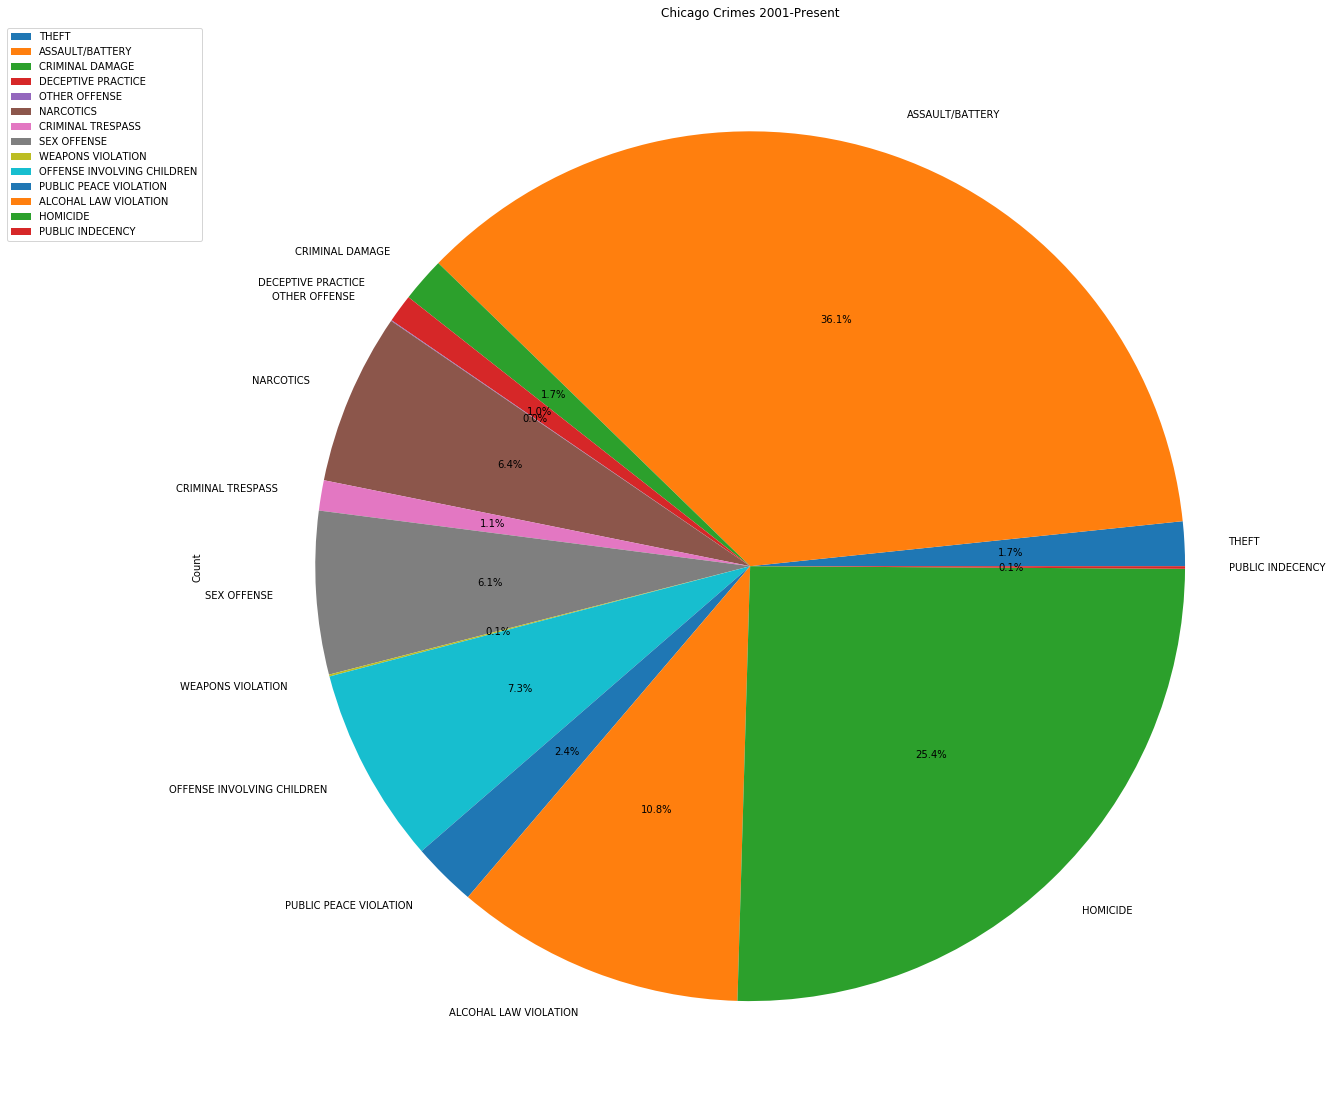

In [55]:
#creating pie chart 
labels=["THEFT","ASSAULT/BATTERY","CRIMINAL DAMAGE","DECEPTIVE PRACTICE","OTHER OFFENSE","NARCOTICS",\
        "CRIMINAL TRESPASS","SEX OFFENSE","WEAPONS VIOLATION","OFFENSE INVOLVING CHILDREN","PUBLIC PEACE VIOLATION","ALCOHAL LAW VIOLATION",\
        "HOMICIDE","PUBLIC INDECENCY"]

pie_by_crime = chi_crime_types.plot(kind="pie", y="Count", title="Chicago Crimes 2001-Present",labels=labels,autopct='%1.1f%%',figsize=(20,20))
plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1)


In [68]:
#creating bar chart

chi_crime_types.set_index('Crime', inplace = True)
chi_crime_types.plot(kind="bar", facecolor="red", alpha=.5,figsize=(20,10))
plt.title("Crimes by Type in Chicago 2001-Present",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)

plt.xticks(fontsize=20,rotation=40)


KeyError: "None of ['Crime'] are in the columns"

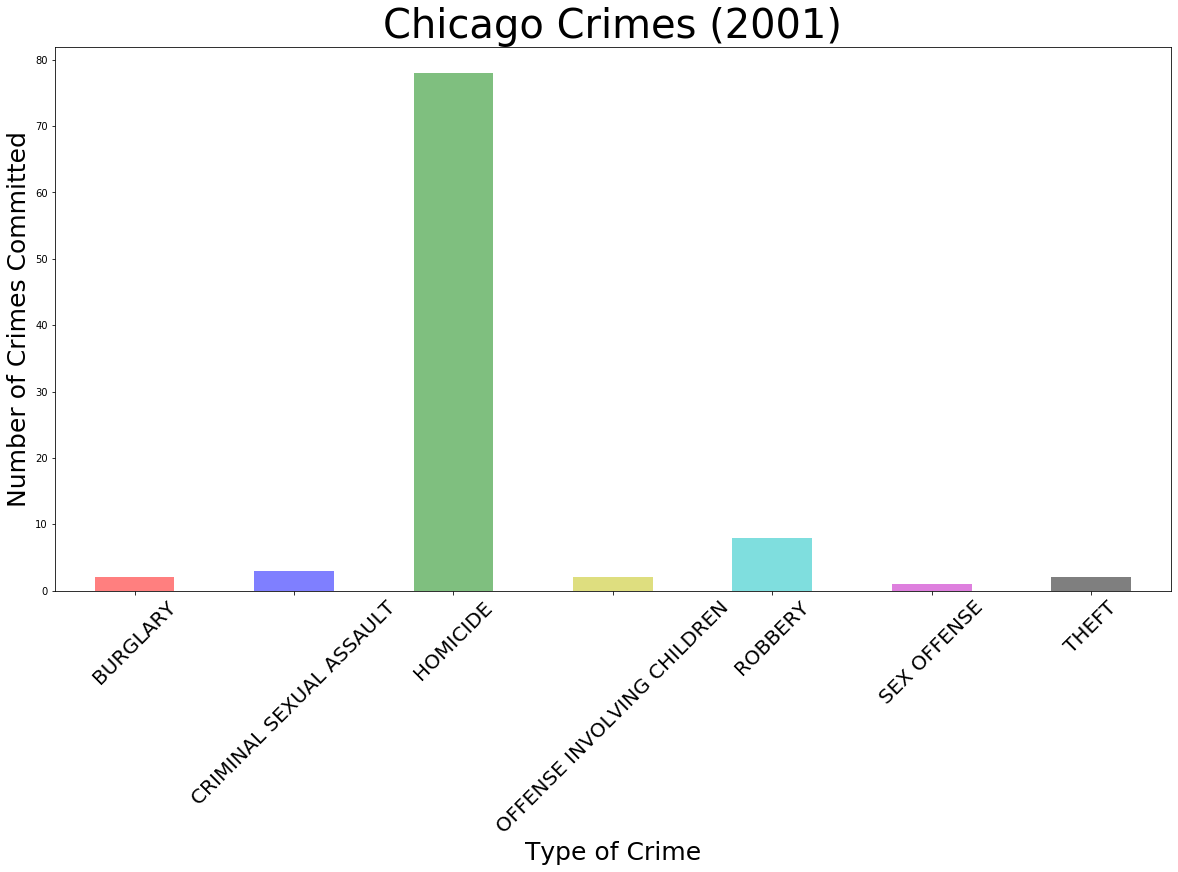

In [121]:
bar_01 = crime_01['Crime'].value_counts()
#creating bar chart

bar_01.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2001)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi01-crime-annual.png")


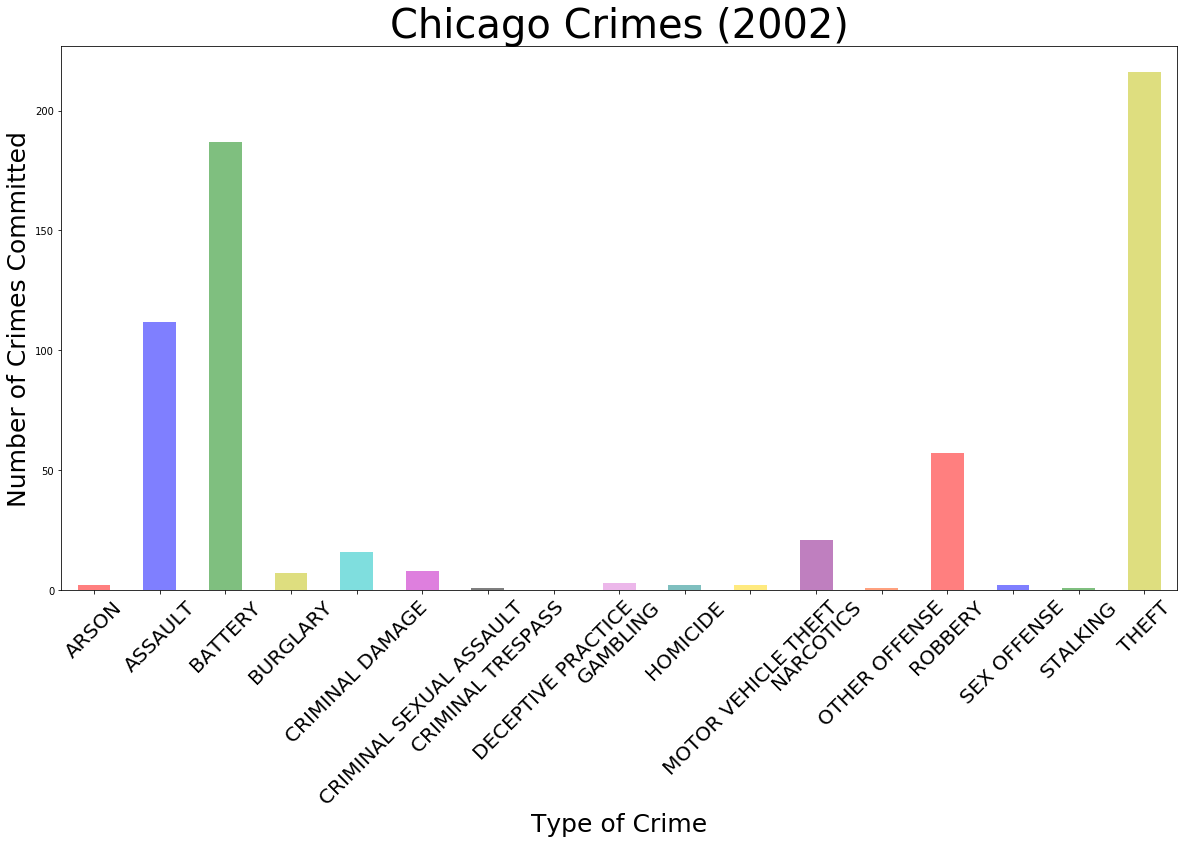

In [116]:
bar_02 = crime_02['Crime'].value_counts()
#creating bar chart

bar_02.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2002)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi02-crime-annual.png")


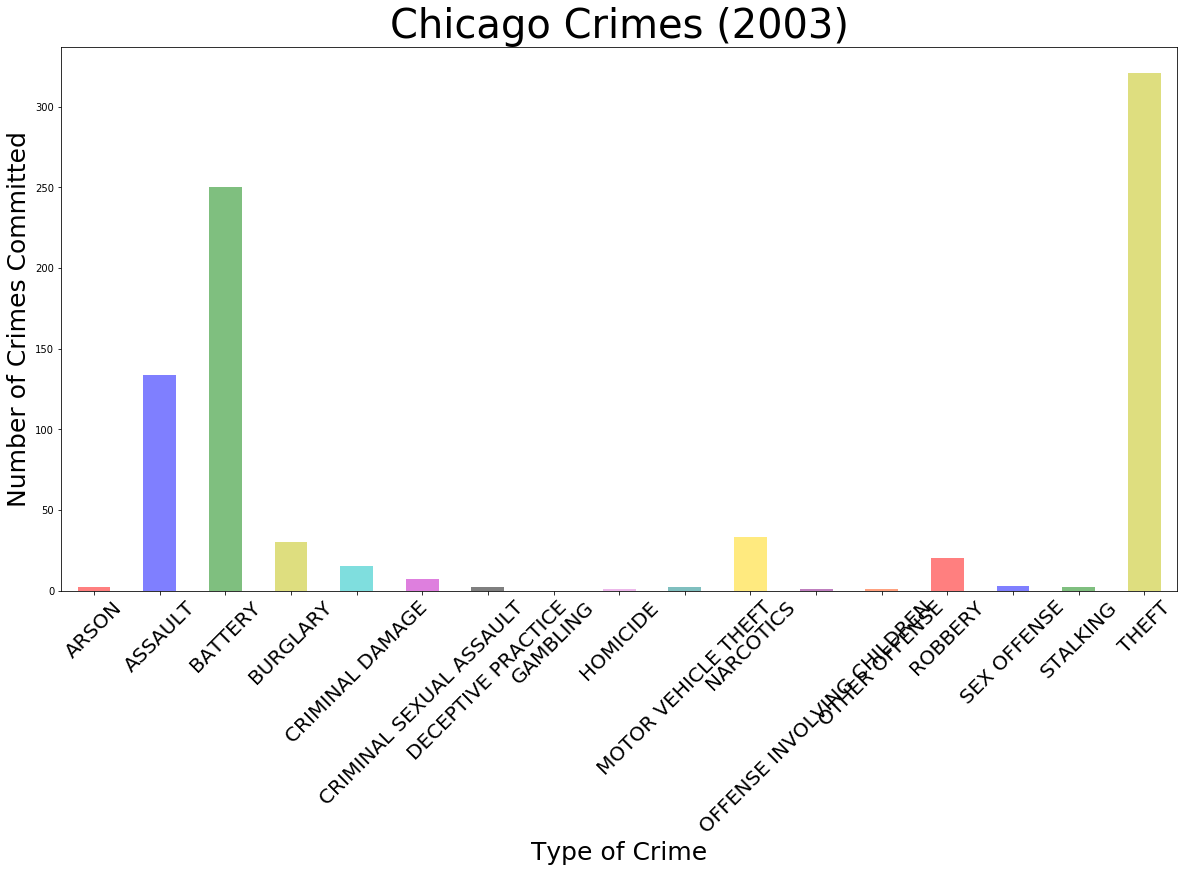

In [115]:
bar_03= crime_03['Crime'].value_counts()
#creating bar chart

bar_03.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2003)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi03-crime-annual.png")


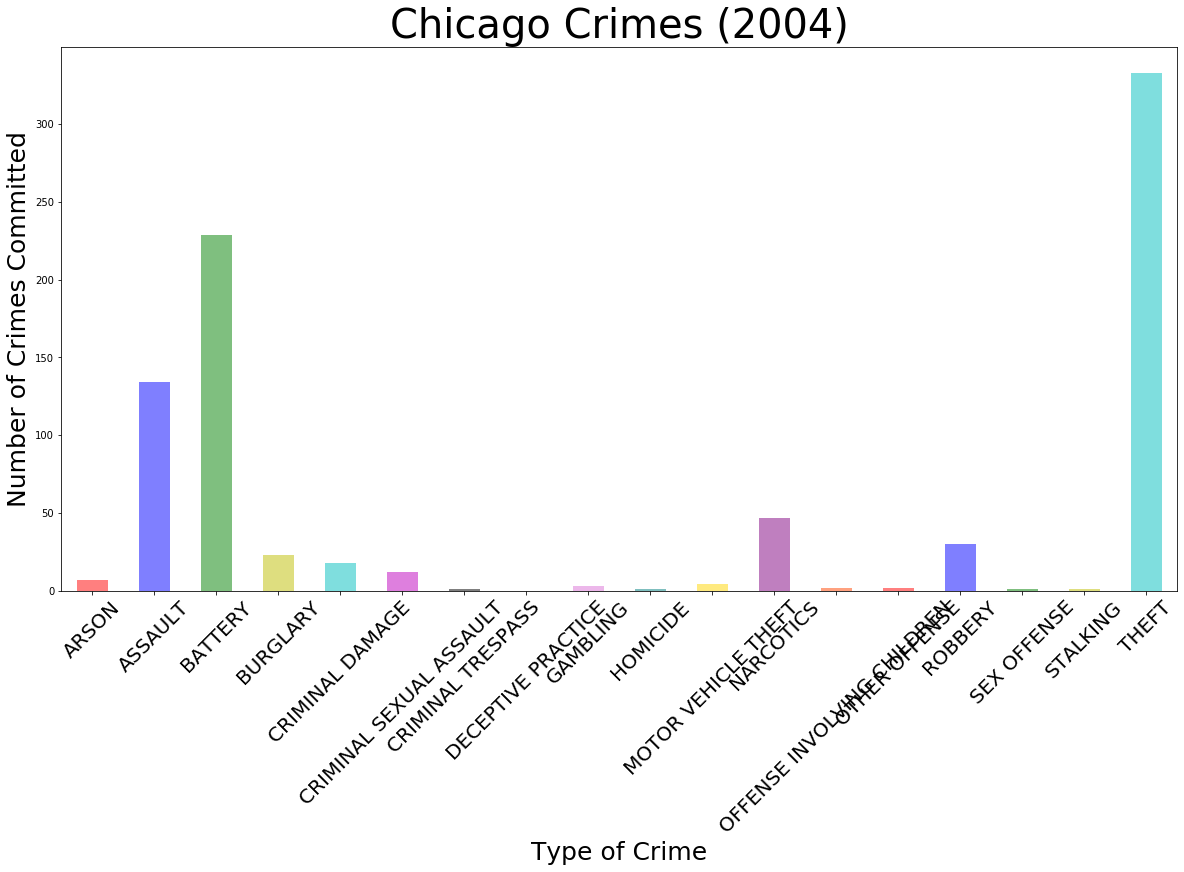

In [113]:
bar_04 = crime_04['Crime'].value_counts()
#creating bar chart

bar_04.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2004)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi04-crime-annual.png")


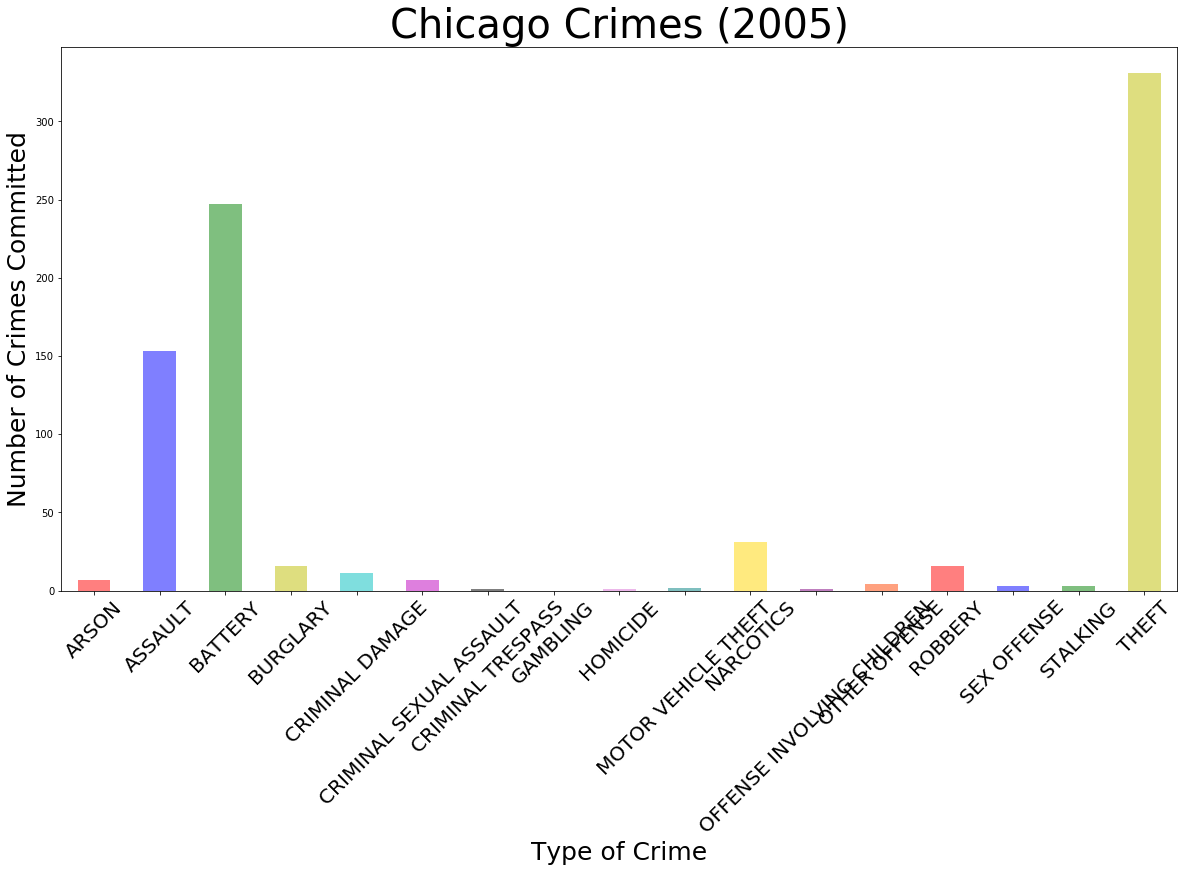

In [112]:
bar_05= crime_05['Crime'].value_counts()
#creating bar chart

bar_05.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2005)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi05-crime-annual.png")


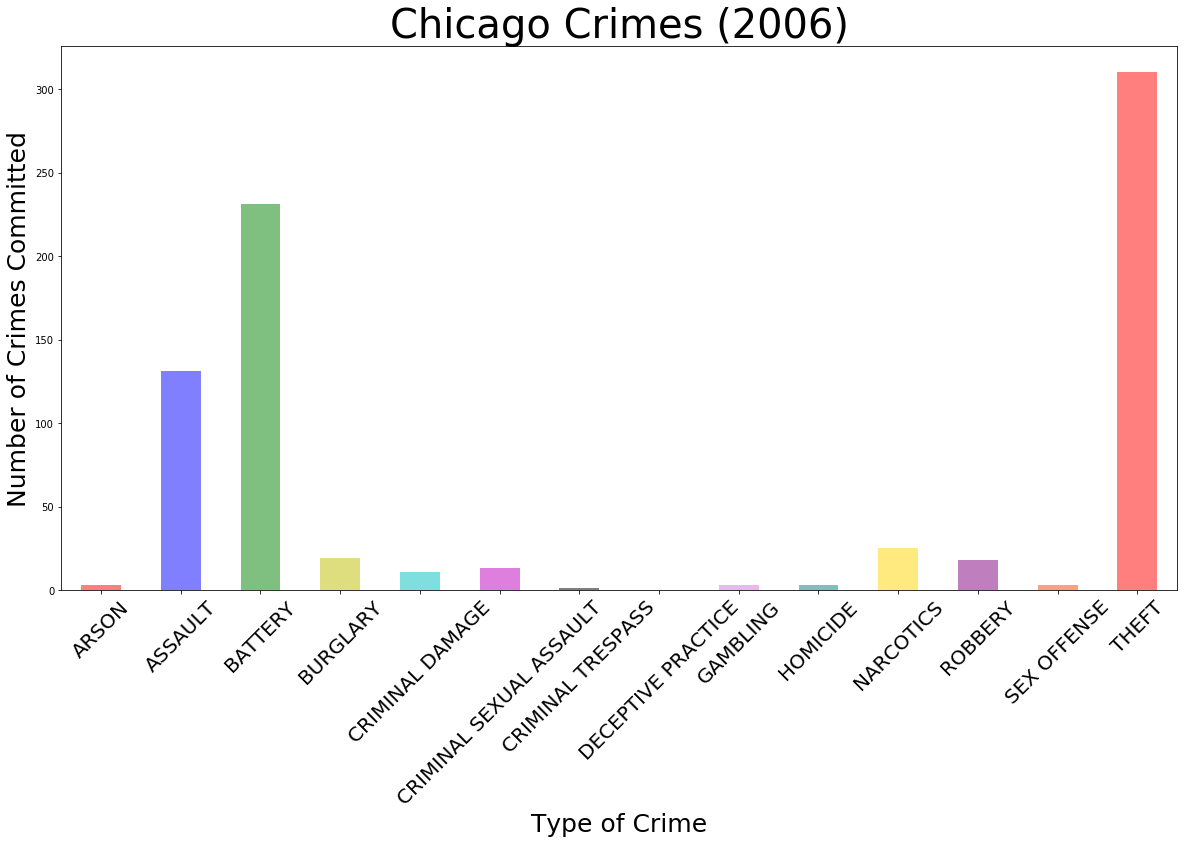

In [111]:
bar_06 = crime_06['Crime'].value_counts()
#creating bar chart

bar_06.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2006)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi06-crime-annual.png")


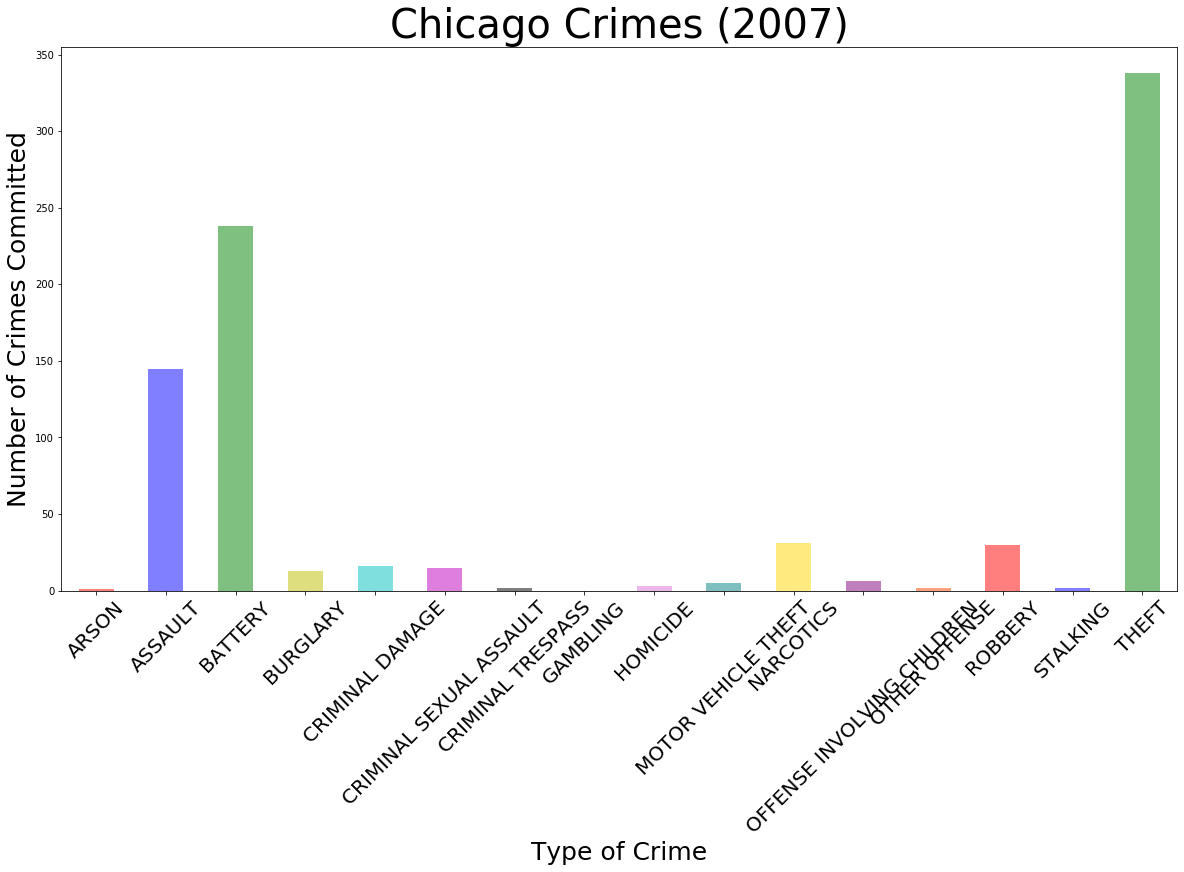

In [110]:
bar_07= crime_07['Crime'].value_counts()
#creating bar chart

bar_07.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2007)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi07-crime-annual.png")


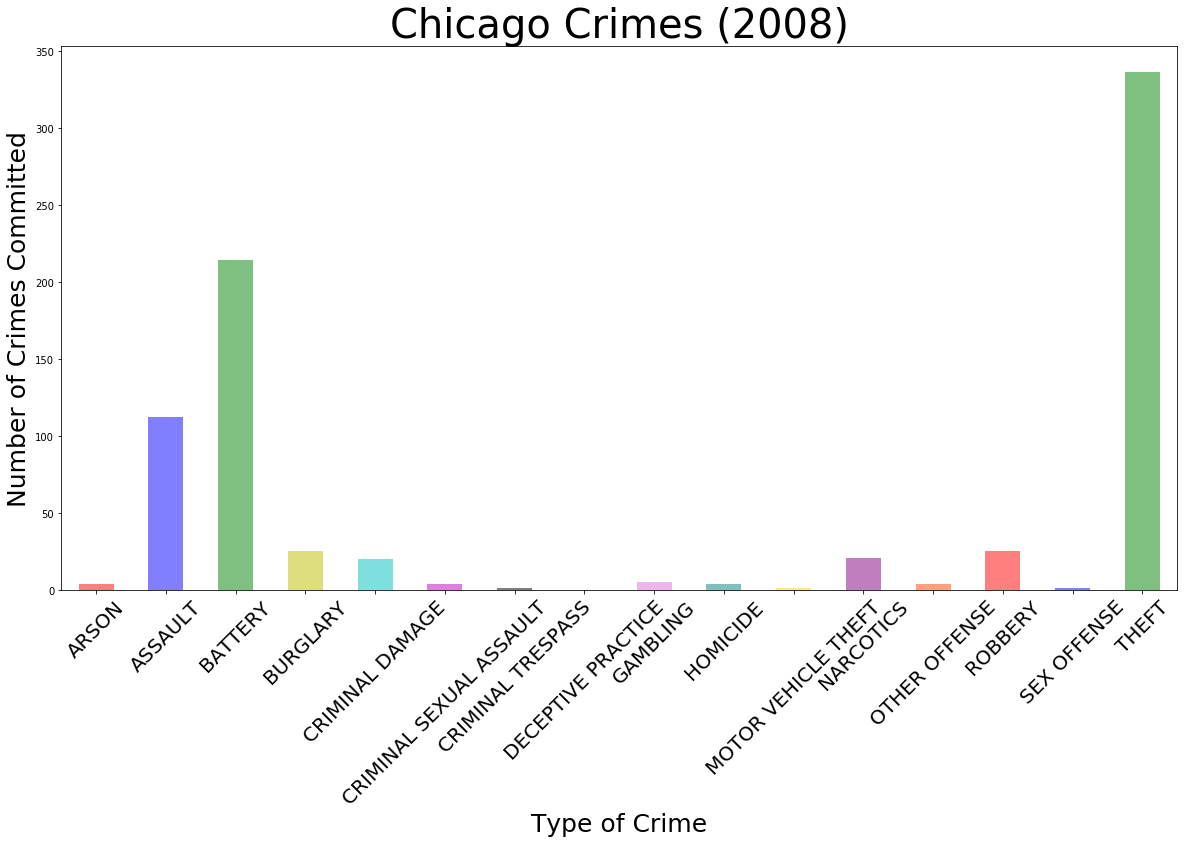

In [109]:
bar_08= crime_08['Crime'].value_counts()
#creating bar chart

bar_08.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2008)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi08-crime-annual.png")


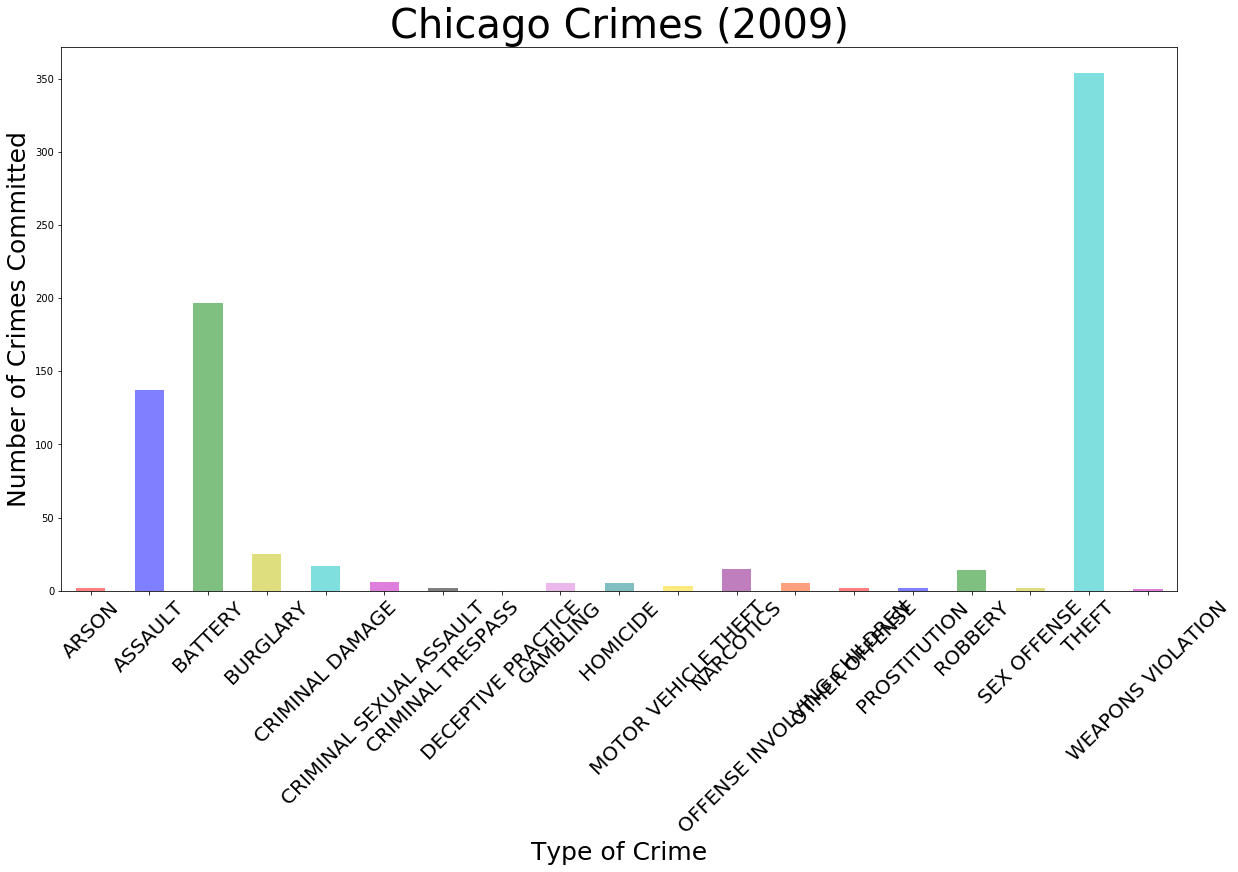

In [108]:
bar_09= crime_09['Crime'].value_counts()
#creating bar chart

bar_09.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2009)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi09-crime-annual.png")


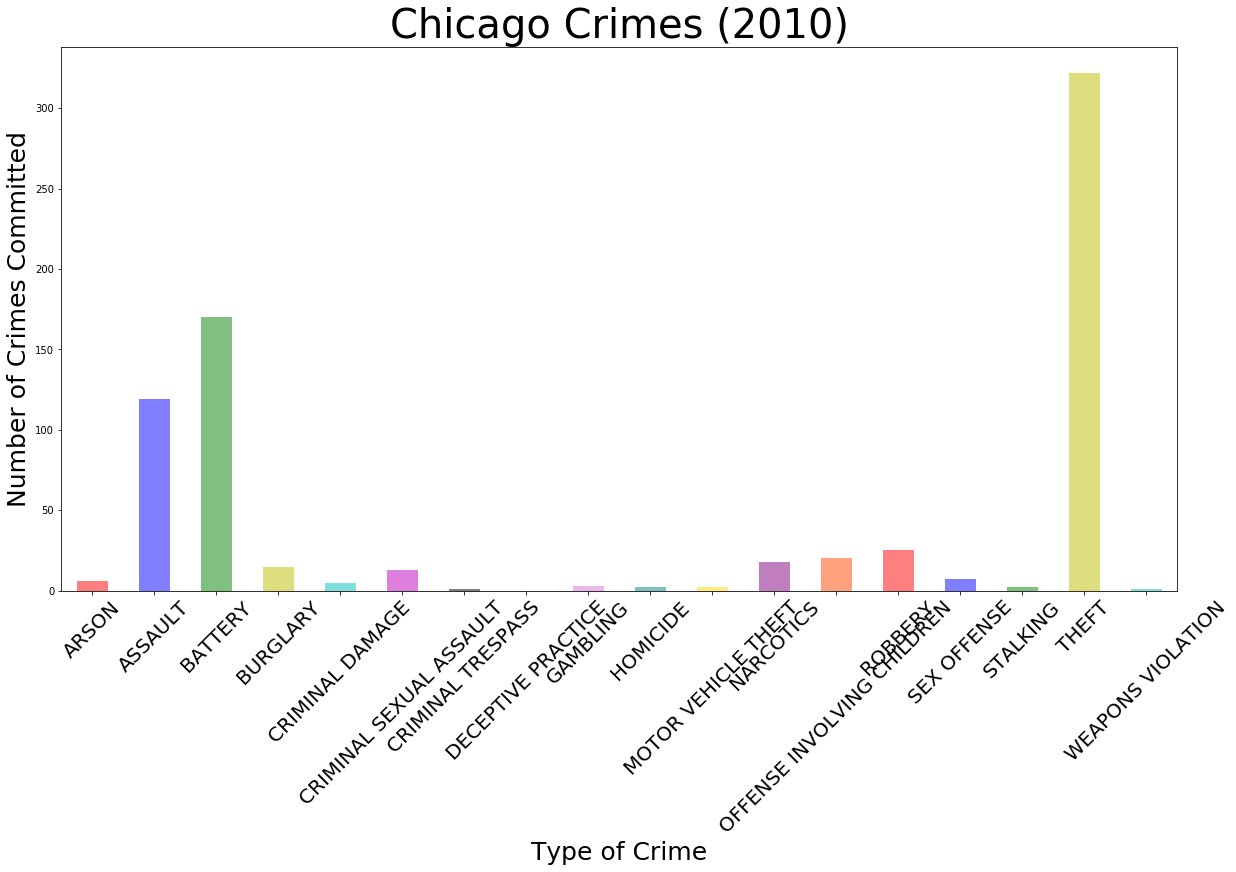

In [107]:
bar_10= crime_10['Crime'].value_counts()
#creating bar chart

bar_10.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2010)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi10-crime-annual.png")


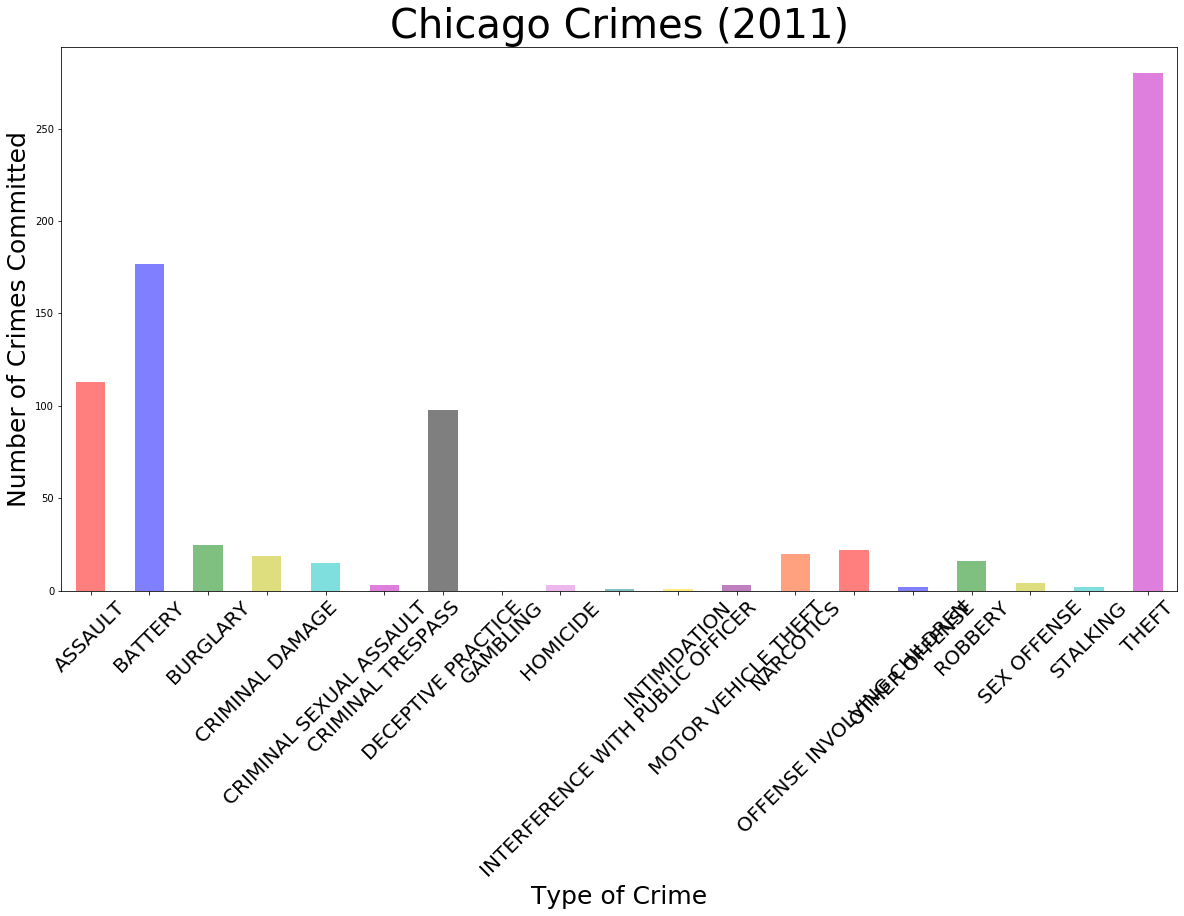

In [106]:
bar_11= crime_11['Crime'].value_counts()
#creating bar chart

bar_11.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2011)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi11-crime-annual.png")


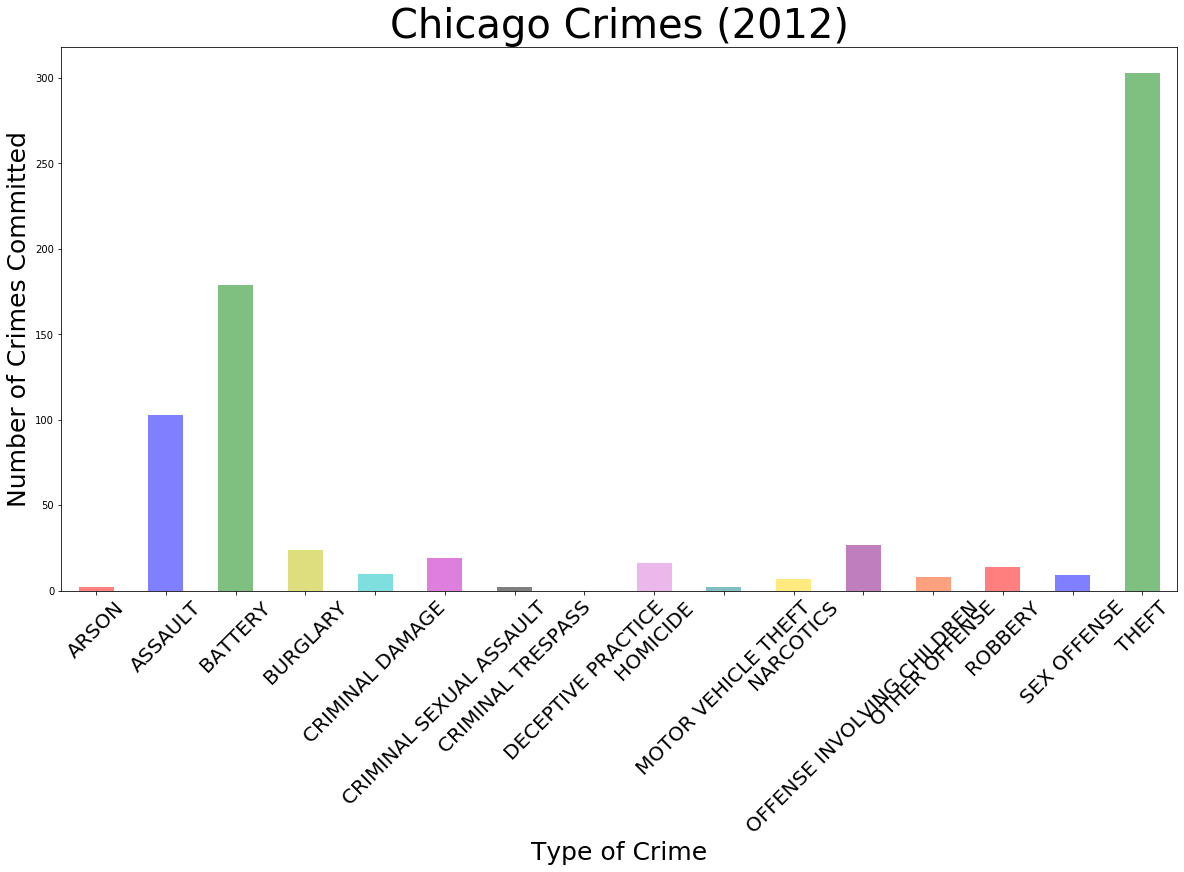

In [105]:
bar_12= crime_12['Crime'].value_counts()
#creating bar chart

bar_12.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2012)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi12-crime-annual.png")


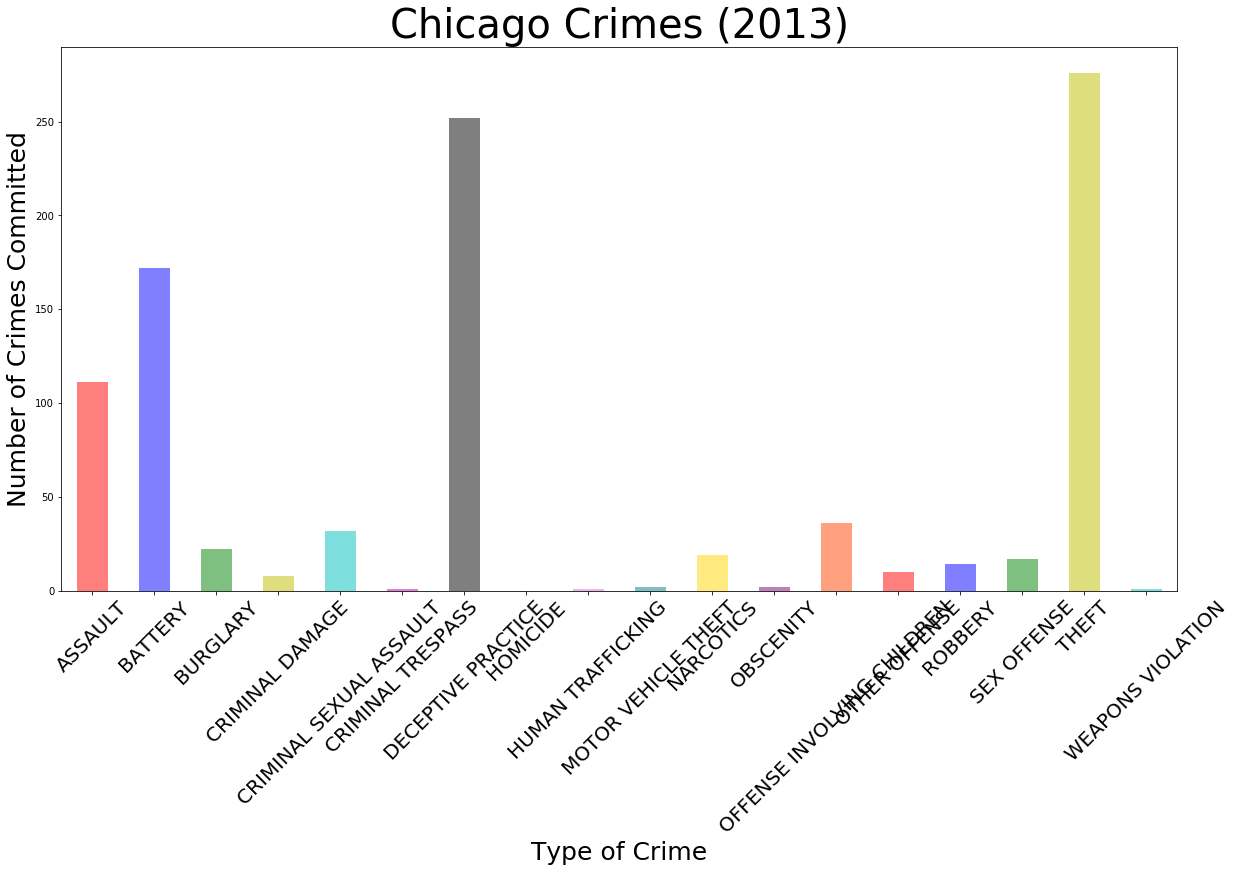

In [104]:
bar_13= crime_13['Crime'].value_counts()
#creating bar chart

bar_13.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2013)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi13-crime-annual.png")


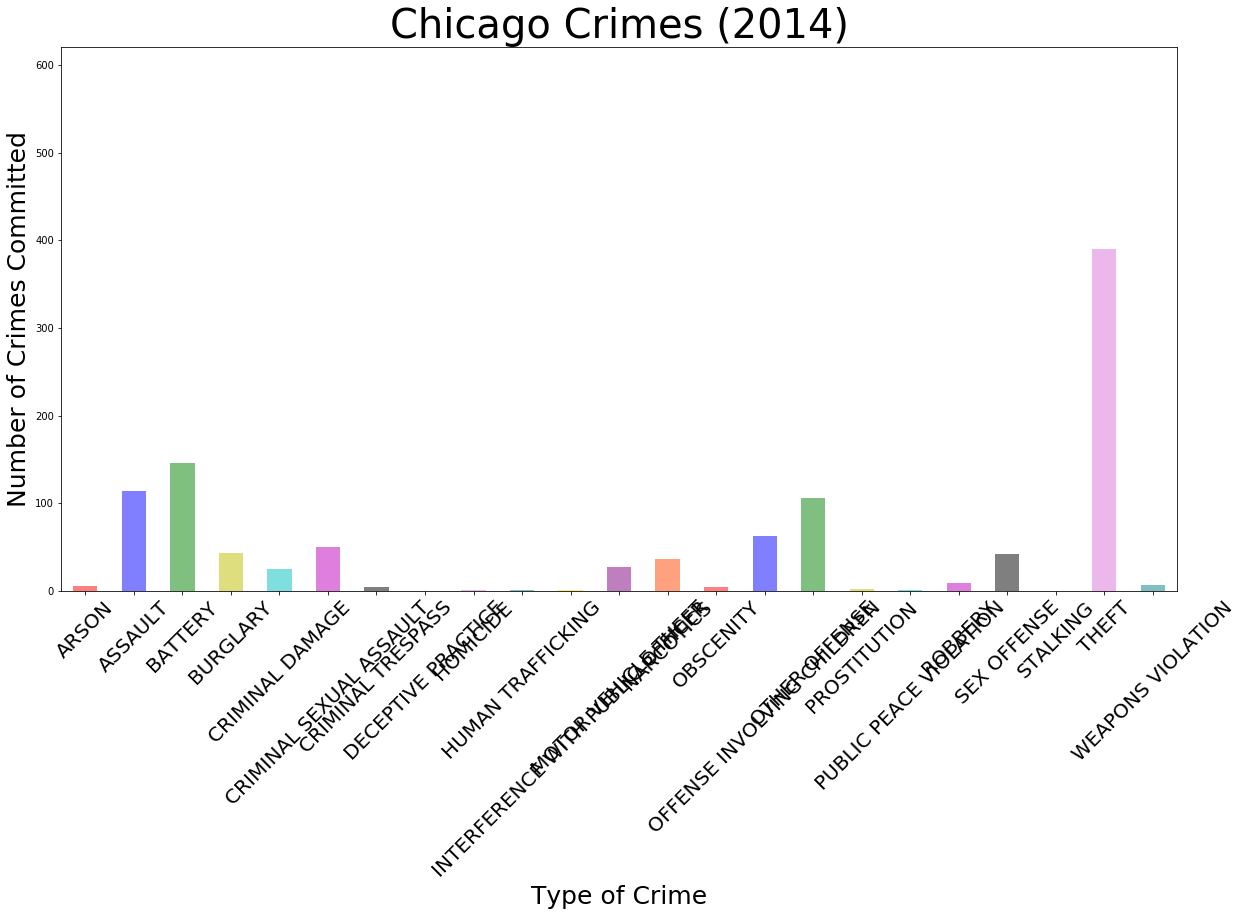

In [103]:
bar_14= crime_14['Crime'].value_counts()
#creating bar chart

bar_14.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2014)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi14-crime-annual.png")


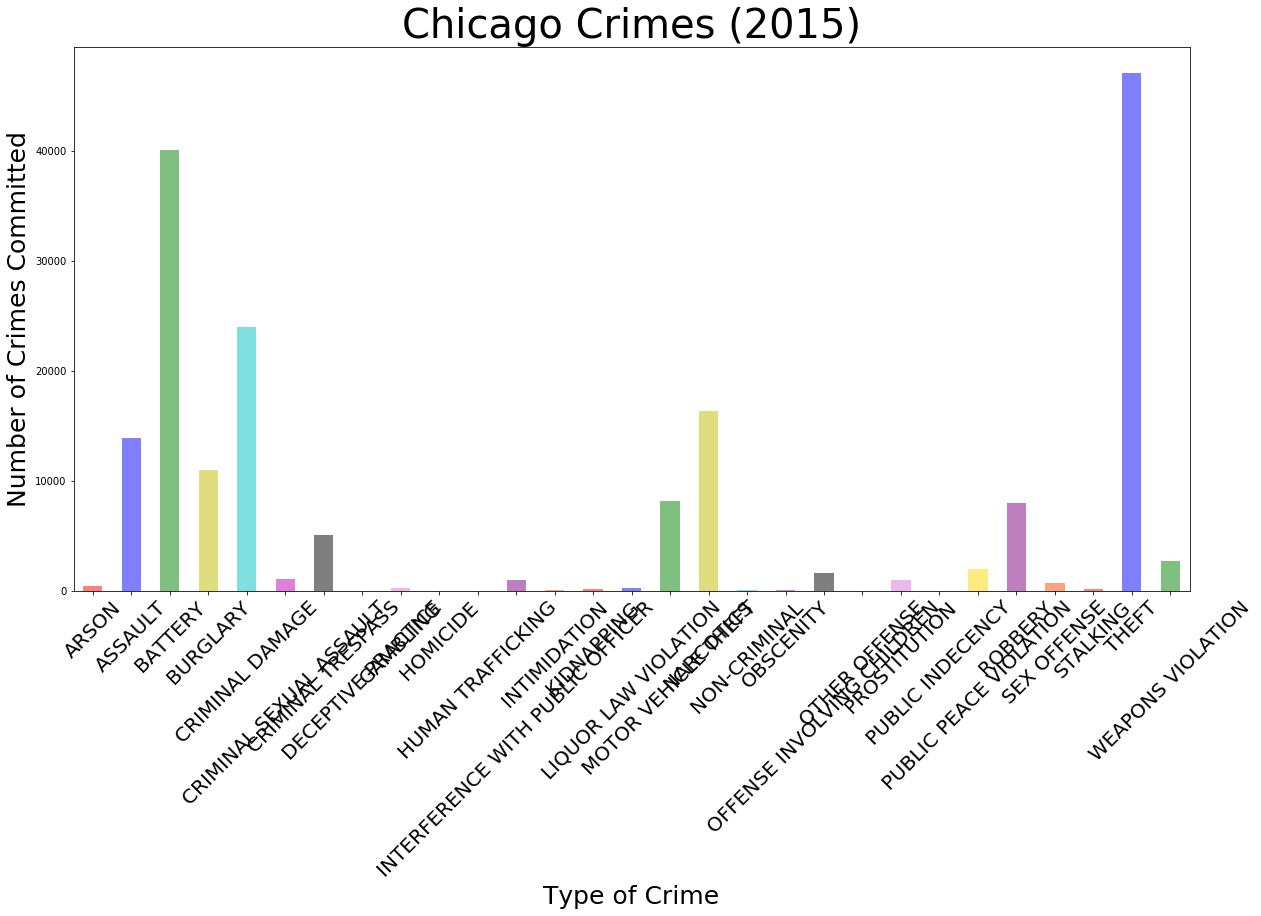

In [102]:
bar_15= crime_15['Crime'].value_counts()
#creating bar chart

bar_15.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2015)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi15-crime-annual.png")


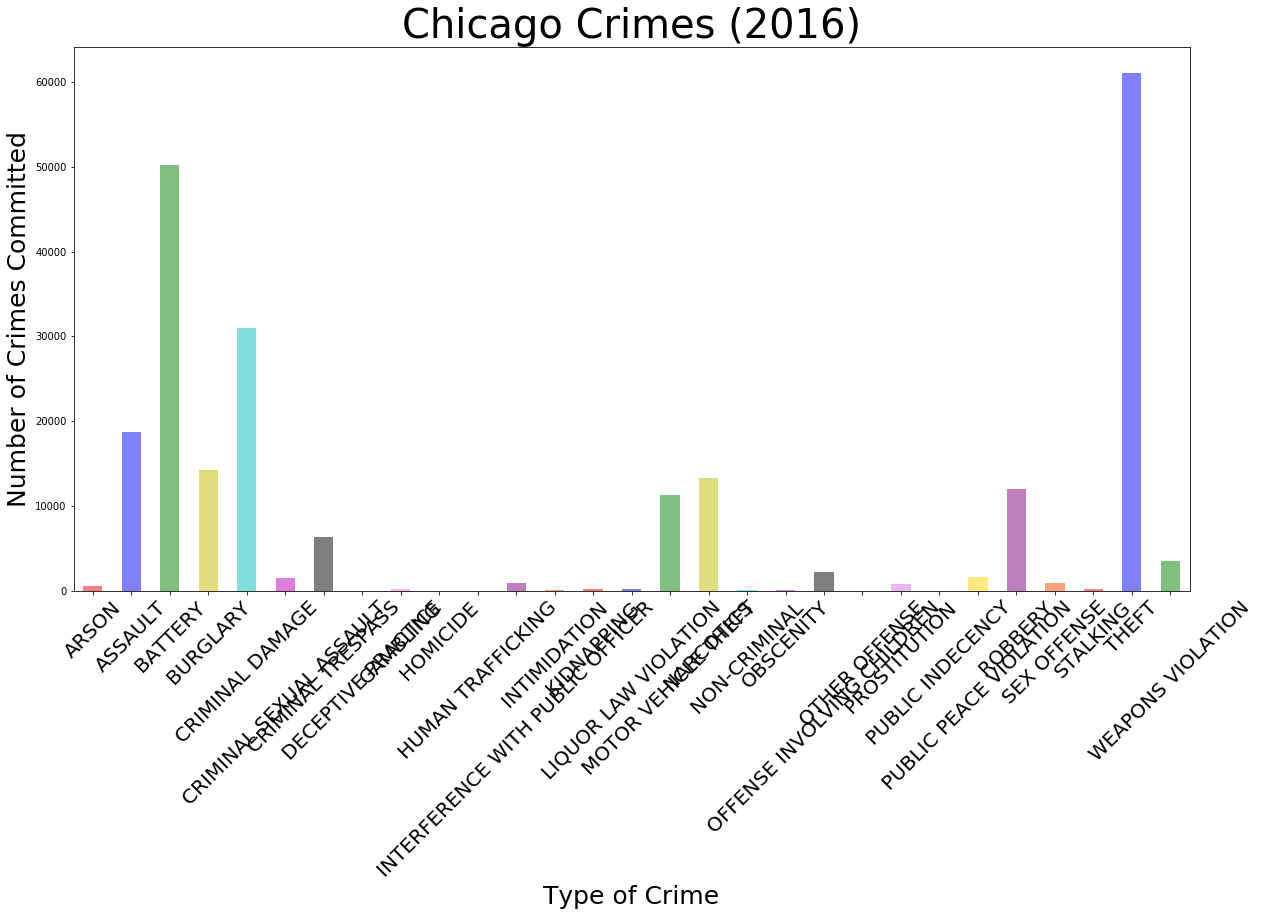

In [101]:
bar_16= crime_16['Crime'].value_counts()
#creating bar chart

bar_16.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2016)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi16-crime-annual.png")


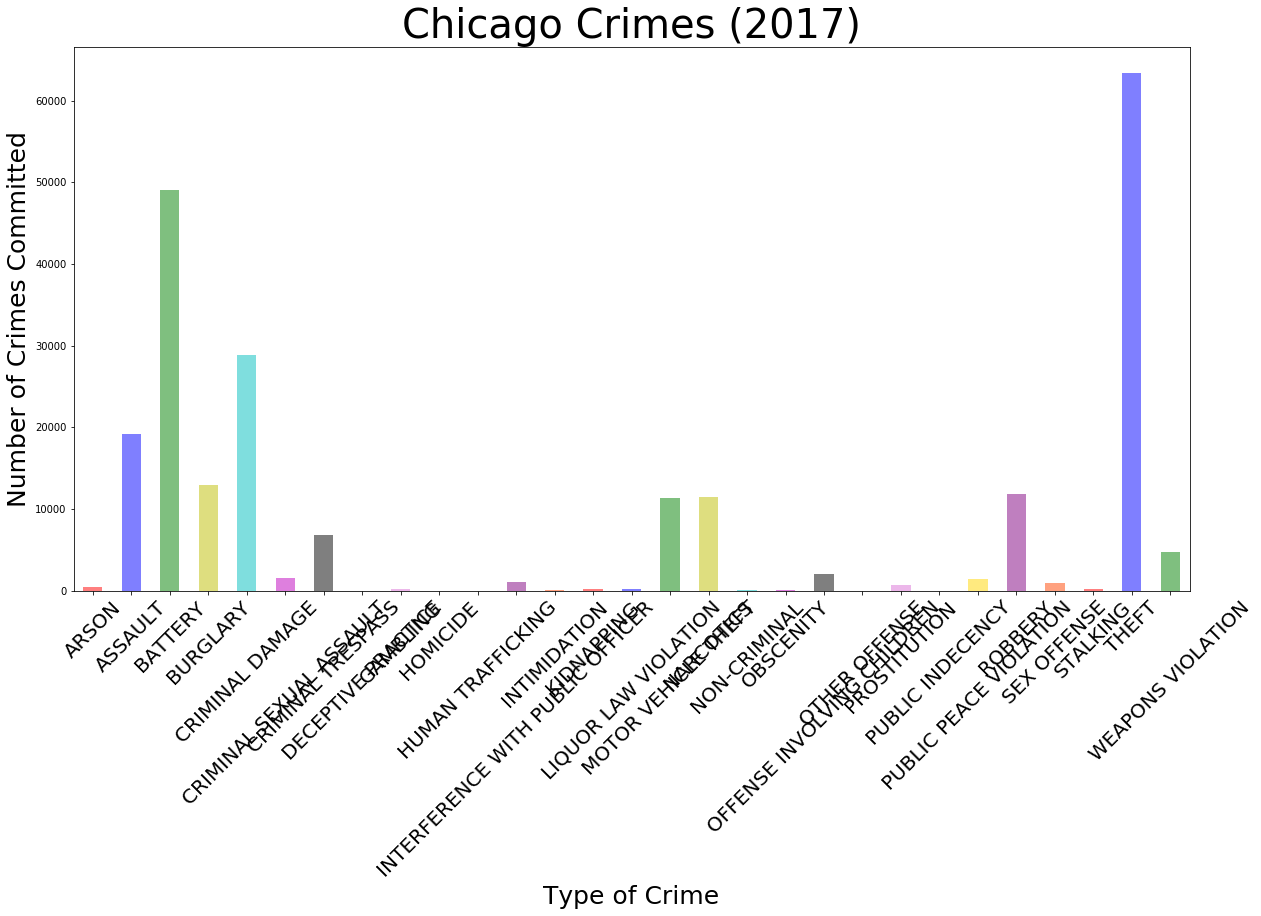

In [100]:
bar_17= crime_17['Crime'].value_counts()
#creating bar chart

bar_17.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2017)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi17-crime-annual.png")


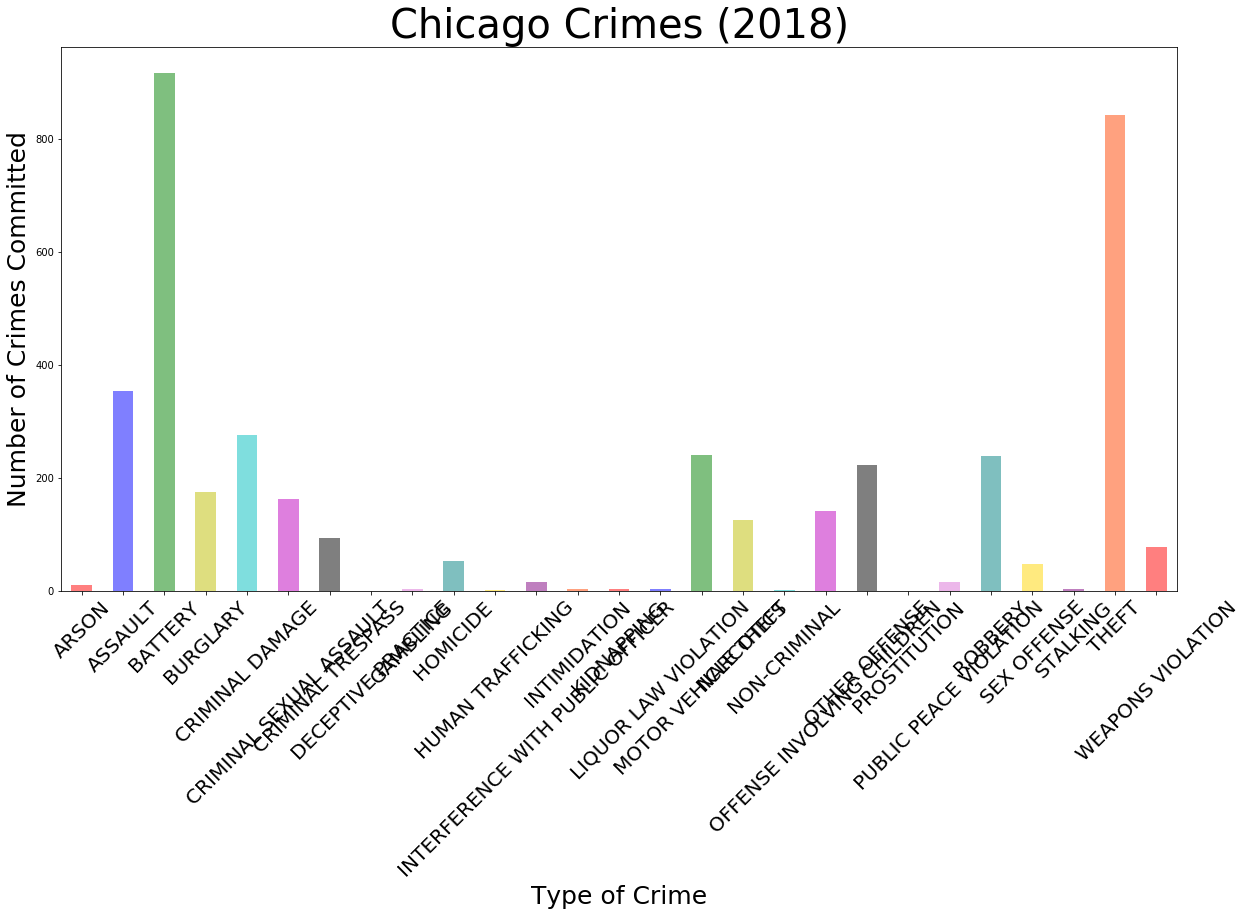

In [99]:
bar_18= crime_18['Crime'].value_counts()
#creating bar chart

bar_18.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2018)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi18-crime-annual.png")


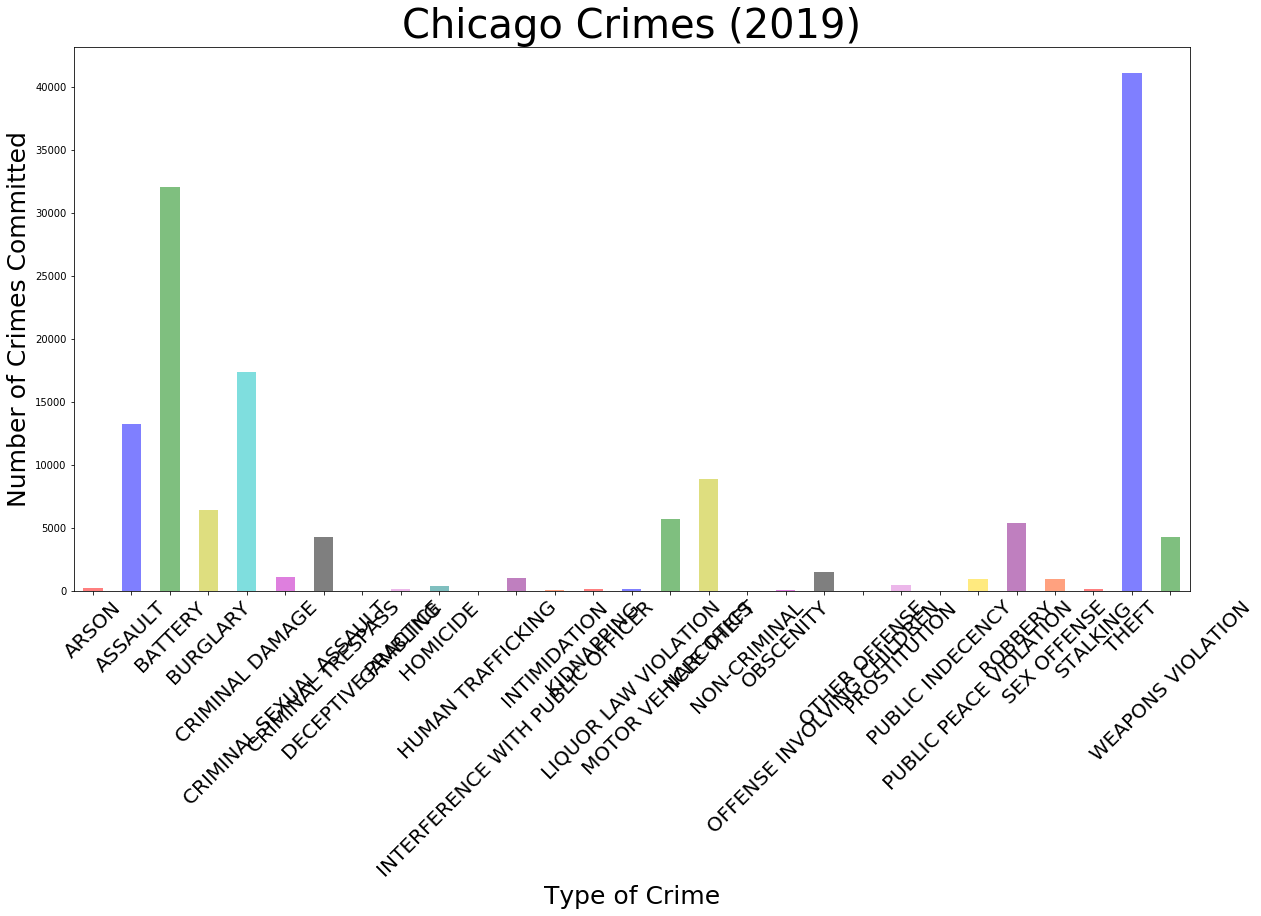

In [98]:
bar_19= crime_19['Crime'].value_counts()
#creating bar chart

bar_19.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2019)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi19-crime-annual.png")


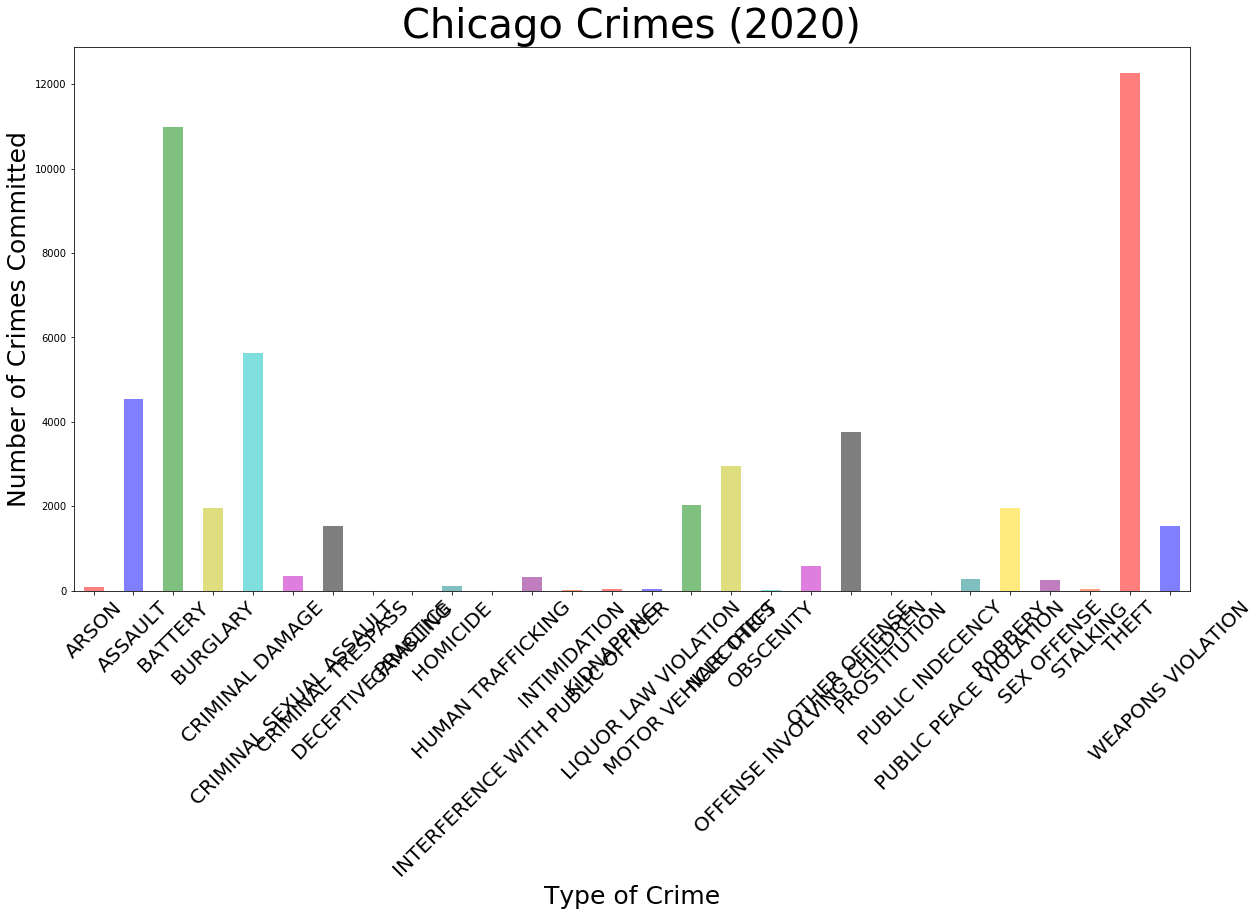

In [97]:
bar_20= crime_20['Crime'].value_counts()
#creating bar chart

bar_20.sort_index().plot(kind="bar", color=colors, alpha=.5,figsize=(20,10))
plt.title("Chicago Crimes (2020)",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.savefig("Resources/chi/chi20-crime-annual.png")



In [ ]:
new_data.head()

In [ ]:
#adding month column to "Trimmed" data frame and extracting the month from the date

new_data['Month'] = pd.DatetimeIndex(new_data['Date']).month
new_data.head()

In [ ]:
#Narrowing "Trimmed" DF to only look at 2020

df_2020=new_data.loc[new_data["Year"]==2020]
df_2020 = pd.DataFrame(df_2020.groupby(["Month"]).count()).reset_index()
df_2020 = df_2020.drop(3)
df_2019=new_data.loc[new_data["Year"]==2019]
df_2019 = pd.DataFrame(df_2019.groupby(["Month"]).count()).reset_index()
df_2018=new_data.loc[new_data["Year"]==2018]
df_2018 = pd.DataFrame(df_2018.groupby(["Month"]).count()).reset_index()
df_2017=new_data.loc[new_data["Year"]==2017]
df_2017 = pd.DataFrame(df_2017.groupby(["Month"]).count()).reset_index()
df_2016=new_data.loc[new_data["Year"]==2016]
df_2016 = pd.DataFrame(df_2016.groupby(["Month"]).count()).reset_index()
df_2015=new_data.loc[new_data["Year"]==2015]
df_2015 = pd.DataFrame(df_2015.groupby(["Month"]).count()).reset_index()
df_2014=new_data.loc[new_data["Year"]==2014]
df_2014 = pd.DataFrame(df_2014.groupby(["Month"]).count()).reset_index()
df_2013=new_data.loc[new_data["Year"]==2013]
df_2013 = pd.DataFrame(df_2013.groupby(["Month"]).count()).reset_index()
df_2012=new_data.loc[new_data["Year"]==2012]
df_2012 = pd.DataFrame(df_2012.groupby(["Month"]).count()).reset_index()
df_2011=new_data.loc[new_data["Year"]==2011]
df_2011 = pd.DataFrame(df_2011.groupby(["Month"]).count()).reset_index()
df_2010=new_data.loc[new_data["Year"]==2010]
df_2010 = pd.DataFrame(df_2010.groupby(["Month"]).count()).reset_index()
df_2009=new_data.loc[new_data["Year"]==2009]
df_2009 = pd.DataFrame(df_2009.groupby(["Month"]).count()).reset_index()
df_2008=new_data.loc[new_data["Year"]==2008]
df_2008 = pd.DataFrame(df_2008.groupby(["Month"]).count()).reset_index()
df_2007=new_data.loc[new_data["Year"]==2007]
df_2007 = pd.DataFrame(df_2007.groupby(["Month"]).count()).reset_index()
df_2006=new_data.loc[new_data["Year"]==2006]
df_2006 = pd.DataFrame(df_2006.groupby(["Month"]).count()).reset_index()
df_2005=new_data.loc[new_data["Year"]==2005]
df_2005 = pd.DataFrame(df_2005.groupby(["Month"]).count()).reset_index()
df_2004=new_data.loc[new_data["Year"]==2004]
df_2004 = pd.DataFrame(df_2004.groupby(["Month"]).count()).reset_index()
df_2003=new_data.loc[new_data["Year"]==2003]
df_2003 = pd.DataFrame(df_2003.groupby(["Month"]).count()).reset_index()
df_2002=new_data.loc[new_data["Year"]==2002]
df_2002 = pd.DataFrame(df_2002.groupby(["Month"]).count()).reset_index()
df_2001=new_data.loc[new_data["Year"]==2001]
df_2001 = pd.DataFrame(df_2001.groupby(["Month"]).count()).reset_index()
df_2020.head()


In [ ]:
x_values = df_2020['Month']
y_values = df_2020['Primary Type']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,16000),fontsize=15,color="red")
plt.title("Crimes by Type in Chicago by Month for 2020",fontsize=20)
plt.xlabel('Month of 2020',fontsize=15)
plt.xticks(np.arange(1, 4, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi20_month_scatter.png")
plt.show()
month = 4
print(f"If this trend continues, the number of crimes commited in Chicago for April, 2020 will be {round(slope * month + intercept,2)}.")


In [ ]:
x_values = df_2019['Month']
y_values = df_2019['Primary Type']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,5000),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2019",fontsize=20)
plt.xlabel('Month of 2019',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi19_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2018['Month']
y_values = df_2018['Primary Type']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,1600),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2018",fontsize=20)
plt.xlabel('Month of 2018',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi18_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2017['Month']
y_values = df_2017['Primary Type']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,20000),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2017",fontsize=20)
plt.xlabel('Month of 2017',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi17_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2016['Month']
y_values = df_2016['Primary Type']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,19000),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2016",fontsize=20)
plt.xlabel('Month of 2016',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi16_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2015['Month']
y_values = df_2015['Primary Type']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,5000),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2015",fontsize=20)
plt.xlabel('Month of 2015',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi15_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2014['Month']
y_values = df_2014['Primary Type']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,350),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2014",fontsize=20)
plt.xlabel('Month of 2014',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi14_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2013['Month']
y_values = df_2013['Primary Type']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,200),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2013",fontsize=20)
plt.xlabel('Month of 2013',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi13_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2012['Month']
y_values = df_2012['Primary Type']

fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,180),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2012",fontsize=20)
plt.xlabel('Month of 2012',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi12_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2011['Month']
y_values = df_2011['Primary Type']

fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,140),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2011",fontsize=20)
plt.xlabel('Month of 2011',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi11_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2010['Month']
y_values = df_2010['Primary Type']

fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,140),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2010",fontsize=20)
plt.xlabel('Month of 2010',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi10_month_scatter.png")
plt.show()

In [ ]:
x_values = df_2009['Month']
y_values = df_2009['Primary Type']

fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,900),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2009",fontsize=20)
plt.xlabel('Month of 2009',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi09_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2008['Month']
y_values = df_2008['Primary Type']

fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,500),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2008",fontsize=20)
plt.xlabel('Month of 2008',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi08_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2007['Month']
y_values = df_2007['Primary Type']

fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,260),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2007",fontsize=20)
plt.xlabel('Month of 2007',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi07_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2006['Month']
y_values = df_2006['Primary Type']

fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,400),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2006",fontsize=20)
plt.xlabel('Month of 2006',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi06_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2005['Month']
y_values = df_2005['Primary Type']

fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,500),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2005",fontsize=20)
plt.xlabel('Month of 2005',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi05_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2004['Month']
y_values = df_2004['Primary Type']

fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,350),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2004",fontsize=20)
plt.xlabel('Month of 2004',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi04_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2003['Month']
y_values = df_2003['Primary Type']

fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,600),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2003",fontsize=20)
plt.xlabel('Month of 2003',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi03_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2002['Month']
y_values = df_2002['Primary Type']

fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,500),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2002",fontsize=20)
plt.xlabel('Month of 2002',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi02_month_scatter.png")
plt.show()


In [ ]:
x_values = df_2001['Month']
y_values = df_2001['Primary Type']

fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,320),fontsize=15,color="red")

plt.title("Crimes by Type in Chicago by Month for 2001",fontsize=20)
plt.xlabel('Month of 2001',fontsize=15)
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('# of Crimes Committed',fontsize=15)
plt.savefig("Resources/chi/chi01_month_scatter.png")
plt.show()
